In [1]:
%%html
<link rel="stylesheet" type="text/css" href="rise.css" />

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
plt.style.use('bmh')
plt.rcParams['figure.figsize'] = [10,5]
plt.rcParams['lines.linewidth'] = 1.5

# Leaky Integrate & Fire (LIF) neuron
**Learning goals**
- You will understand how a cell membrane can be described by a RC circuit.
- You will understand the concept of the LIF neuron model.
- You will be able to simulate a LIF neuron.
- You will be able to plot spike rasters.
- You will be able to simulate stochastic synaptic input to a LIF neuron.

Passive cell membrane RC circuit model.

<img src="images/RC-circuit.jpg" width="50%">

Passive cell membrane RC circuit model:

$I = C \frac{dV}{dt} + g \left( V - E \right)$

$g = \frac{1}{R}$

- $I$: current (i.e., flowing across membrane)
- $V$: voltage (i.e., across membrane)
- $R$: resistance (e.g., must flow through ion channels)
- $C$: capacitance (i.e., due to charge separation across lipid membrane)
- $g$: conductance

Rearranging the above equation...

$C \frac{dV}{dt} = -g \left( V - E \right) + I$

$\tau = R C$

$\tau \frac{dV}{dt} = - \left( V - E \right) + \frac{I}{g}$

- $\tau$: time constant

Note that a real neuron's membrane has multiple types of conductances such as ion channels and transporters that are themselves dynamic (non-constant).

<img src="images/RC-circuit-K-Na-Ca-Cl.jpg" width="50%">

The Leaky Integrate and Fire (LIF) neuron model ignores all of this and approximates the membrane as having a single constant (leak) ocnductance.

<img src="images/RC-circuit.jpg" width="50%">

Leaky Integrate and Fire (LIF) neuron membrane dynamics:

$\tau \frac{dV}{dt} = - \left( V - E \right) + \frac{I}{g}$

Membrane voltage change for single time step $dt$:

$dV = \left( - \left( V - E \right) + \frac{I}{g} \right) \frac{dt}{\tau}$

$dV = \left( - \left( V - E \right) + \frac{I}{g} \right) \frac{dt}{\tau}$

**Leak:** At any given moment in time, the leak current is defined by the conductance ($g$) and the difference between the membrane voltage ($V$) and the reversal potential ($E$) for whichever ion(s) are flowing.

**Integrate:** You can calculate how the neuron's membrane voltage changes over time ($\frac{dV}{dt}$) by integrating the above equation over time.

**Fire:** If $V \ge V_{threshold}$ at time $t$:
1. Fire spike at time $t$.
2. $V \rightarrow V_{reset}$ for a defined refractory period.

Use Euler's method to compute membrane voltage change for single time step $dt$. Note that $dt$ must be short relative to the dynamics you want to simulate.

$dV = \left( - \left( V - E \right) + \frac{I}{g} \right) \frac{dt}{\tau}$

<img src="images/euler-method.jpg">

In current-clamp you are injecting a known current time series (e.g., a square pulse) across the cell membrane:

| **time:** | $t=0$ | $t=1$ | $t=2$ | $t=3$ | $\dots$ | $t=100$ |
| ----- | ----- | ----- | ----- | ----- | ------- | ------- |
| **current $I(t)$:** | $I(0)$ | $I(1)$ | $I(2)$ | $I(3)$ | $\dots$ | $I(100)$ |

Assume at the start of your recording the neuron's membrane voltage ($V$) is -75 mV:

| **time:** | $t=0$ | $t=1$ | $t=2$ | $t=3$ | $\dots$ | $t=100$ |
| ----- | ----- | ----- | ----- | ----- | ------- | ------- |
| **current $I(t)$:** | $I(0)$ | $I(1)$ | $I(2)$ | $I(3)$ | $\dots$ | $I(100)$ |
| **voltage $V(t)$:** | $V(0) = -75$ | | | | $\dots$ | |

In principle, the conductange ($g$) and reversal potential ($E$) could also change in time, but for simplicity let's assume they are constant.

To compute the neuron's membrane voltage ($V$) for all subsequent time points, you just need to compute the change in voltage ($dV$) for each time step:

| **time:** | $t=0$ | $t=1$ | $t=2$ | $t=3$ | $\dots$ | $t=100$ |
| ----- | ----- | ----- | ----- | ----- | ------- | ------- |
| **current $I(t)$:** | $I(0)$ | $I(1)$ | $I(2)$ | $I(3)$ | $\dots$ | $I(100)$ |
| **voltage $V(t)$:** | $V(0)$ | $V(1) = V(0) + dV(0)$ | | | $\dots$ | |

$dV(0) = \left( - \left( V(0) - E \right) + \frac{I(0)}{g} \right) \frac{dt}{\tau}$

To compute the neuron's membrane voltage ($V$) for all subsequent time points, you just need to compute the change in voltage ($dV$) for each time step:

| **time:** | $t=0$ | $t=1$ | $t=2$ | $t=3$ | $\dots$ | $t=100$ |
| ----- | ----- | ----- | ----- | ----- | ------- | ------- |
| **current $I(t)$:** | $I(0)$ | $I(1)$ | $I(2)$ | $I(3)$ | $\dots$ | $I(100)$ |
| **voltage $V(t)$:** | $V(0)$ | $V(1)$ | $V(2) = V(1) + dV(1)$ | | $\dots$ | |

$dV(1) = \left( - \left( V(1) - E \right) + \frac{I(1)}{g} \right) \frac{dt}{\tau}$

To compute the neuron's membrane voltage ($V$) for all subsequent time points, you just need to compute the change in voltage ($dV$) for each time step:

| **time:** | $t=0$ | $t=1$ | $t=2$ | $t=3$ | $\dots$ | $t=100$ |
| ----- | ----- | ----- | ----- | ----- | ------- | ------- |
| **current $I(t)$:** | $I(0)$ | $I(1)$ | $I(2)$ | $I(3)$ | $\dots$ | $I(100)$ |
| **voltage $V(t)$:** | $V(0)$ | $V(1)$ | $V(2)$ | $V(3) = V(2) + dV(2)$ | $\dots$ | |

$dV(2) = \left( - \left( V(2) - E \right) + \frac{I(2)}{g} \right) \frac{dt}{\tau}$

To compute the neuron's membrane voltage ($V$) for all subsequent time points, you just need to compute the change in voltage ($dV$) for each time step:

| **time:** | $t=0$ | $t=1$ | $t=2$ | $t=3$ | $\dots$ | $t=100$ |
| ----- | ----- | ----- | ----- | ----- | ------- | ------- |
| **current $I(t)$:** | $I(0)$ | $I(1)$ | $I(2)$ | $I(3)$ | $\dots$ | $I(100)$ |
| **voltage $V(t)$:** | $V(0)$ | $V(1)$ | $V(2)$ | $V(3)$ | $\dots$ | $V(100) = V(99) + dV(99)$ |

$dV(99) = \left( - \left( V(99) - E \right) + \frac{I(99)}{g} \right) \frac{dt}{\tau}$

To compute the neuron's membrane voltage ($V$) for all subsequent time points, you just need to compute the change in voltage ($dV$) for each time step:

| **time:** | $t=0$ | $t=1$ | $t=2$ | $t=3$ | $\dots$ | $t=100$ |
| ----- | ----- | ----- | ----- | ----- | ------- | ------- |
| **current $I(t)$:** | $I(0)$ | $I(1)$ | $I(2)$ | $I(3)$ | $\dots$ | $I(100)$ |
| **voltage $V(t)$:** | $V(0)$ | $V(1)$ | $V(2)$ | $V(3)$ | $\dots$ | $V(100)$ |

$dV(t) = \left( - \left( V(t) - E \right) + \frac{I(t)}{g} \right) \frac{dt}{\tau}$

$V(t+dt) = V(t) + dV(t)$

In [3]:
def LIF_simulation(I, dt, V0=-75, E=-75, g=10, tau=10, V_threshold=-55, V_reset=-75, tau_refractory=2):
    # Default parameters are for a typical neuron:
    # I: injected current (pA) for all time points in the simulation
    # dt: sample interval (ms)
    # V0: initial membrane voltage (mV) at the start of the simulation
    # E: reversal potential (mV)
    # g: conductance (nS)
    # tau: membrane time constant (ms)
    # V_threshold: spike threshold (mV)
    # V_reset: refractory potential (mV)
    # tau_refractory: refractory time (ms)
    
    # list of spike times
    spike_times = []

    # we will use this to keep track of whether the neuron is in a refractory period
    refractory_time = 0

    # init voltage array for all time steps
    V = np.zeros(I.shape)

    # set the initial voltage
    V[0] = V0

    for i in range(1, len(V)):
        # compute voltage at time step i based on the voltage at time step i-1

        # in refractory period?
        if refractory_time > 0:
            V[i] = V_reset
            refractory_time -= dt
            continue
        
        # change in membrane voltage for ith time step
        dV = ( -(V[i-1] - E) + I[i-1] / g ) * (dt / tau)

        V[i] = V[i-1] + dV

        # spike?
        if V[i] >= V_threshold:
            # record spike time step index (we'll convert to time later)
            spike_times.append(i * dt)
            V[i] = 0  # just so spike is obvious
            # start refractory period
            refractory_time = tau_refractory

    # return LIF neuron membrane voltage time series and array of spike times
    return V, spike_times

Simulate a LIF neuron.

In [4]:
dt = 0.1  # (ms)
time = np.arange(0, 250+dt, dt)
I = np.zeros(time.shape)  # (pA)
I[(time >= 40) & (time < 100)] = 150
I[(time >= 140) & (time < 200)] = 300

V, spike_times = LIF_simulation(I, dt)

spike_times

[150.9, 163.9, 176.9, 189.9]

In [5]:
def LIF_plot(time, I, V):
    plt.subplot(2, 1, 1)
    plt.plot(time, I)
    plt.ylabel('Current (pA)')
    
    plt.subplot(2, 1, 2)
    plt.plot(time, V)
    plt.xlabel('Time (ms)')
    plt.ylabel('Voltage (mV)')
    
    plt.tight_layout();

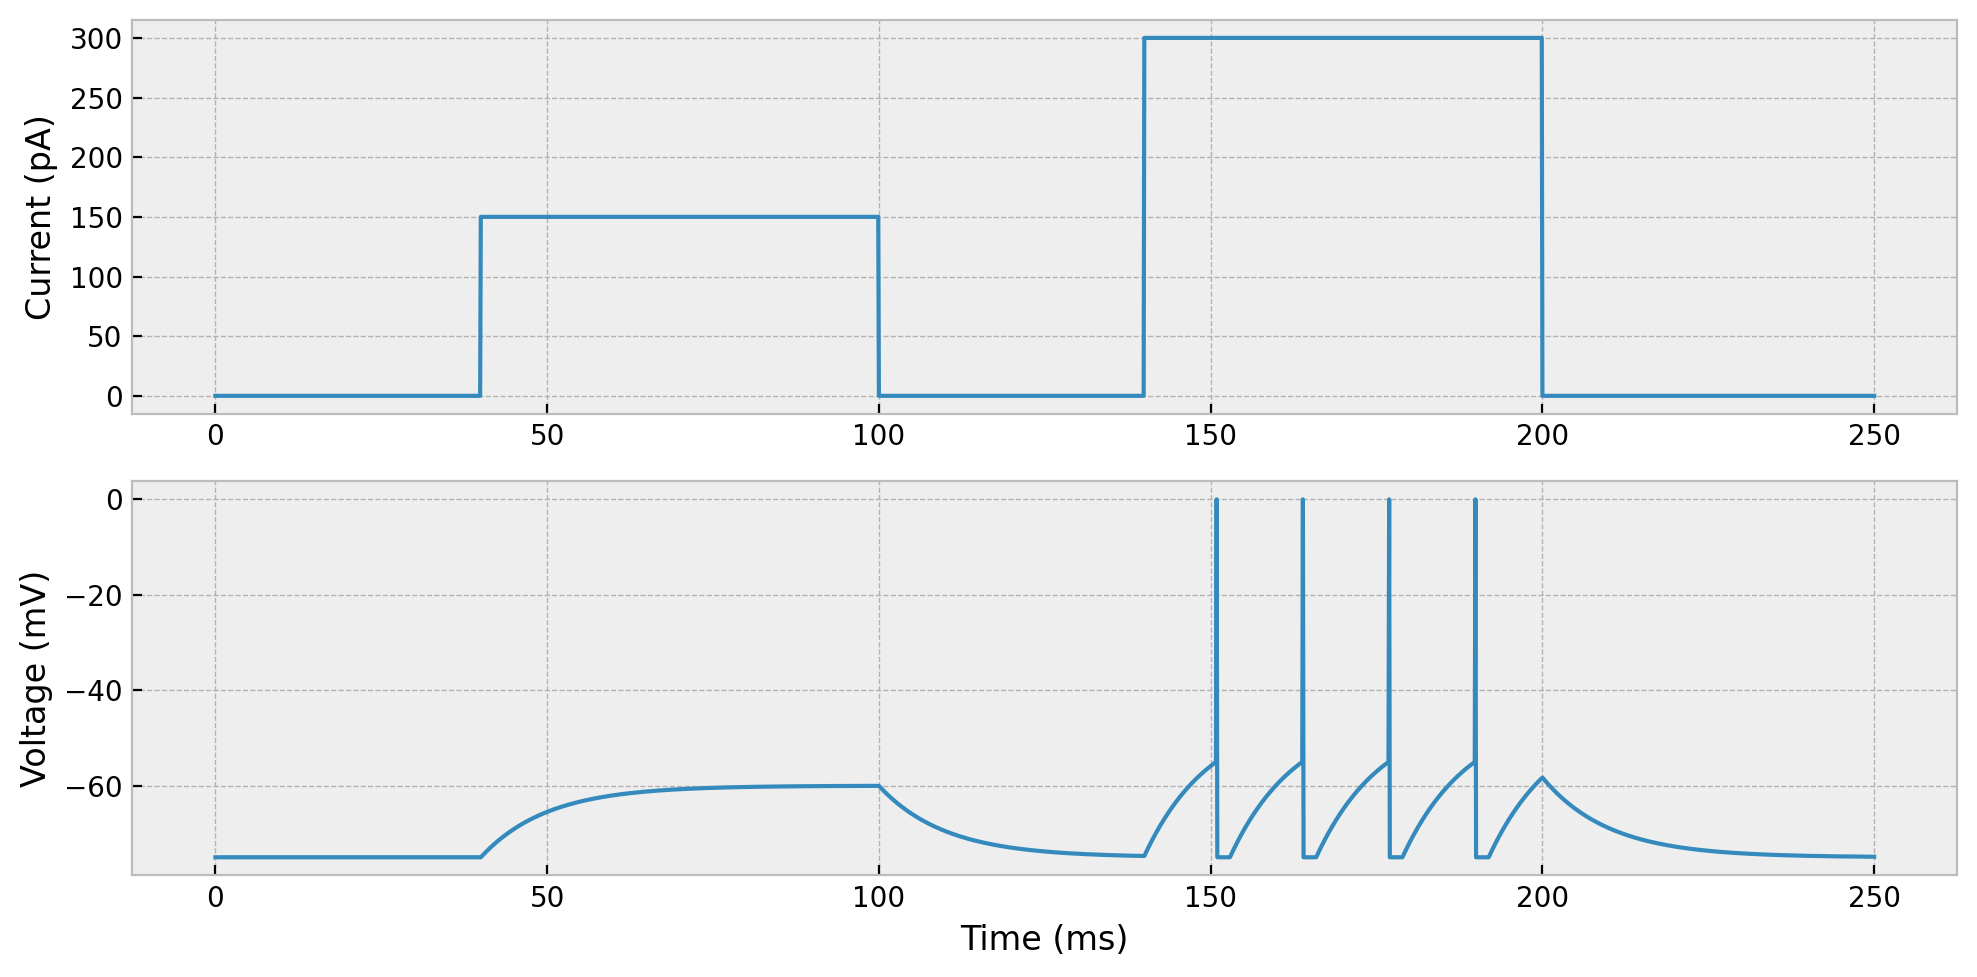

In [6]:
LIF_plot(time, I, V)

What if you changed the spike threshold from -55 to -65 mV?

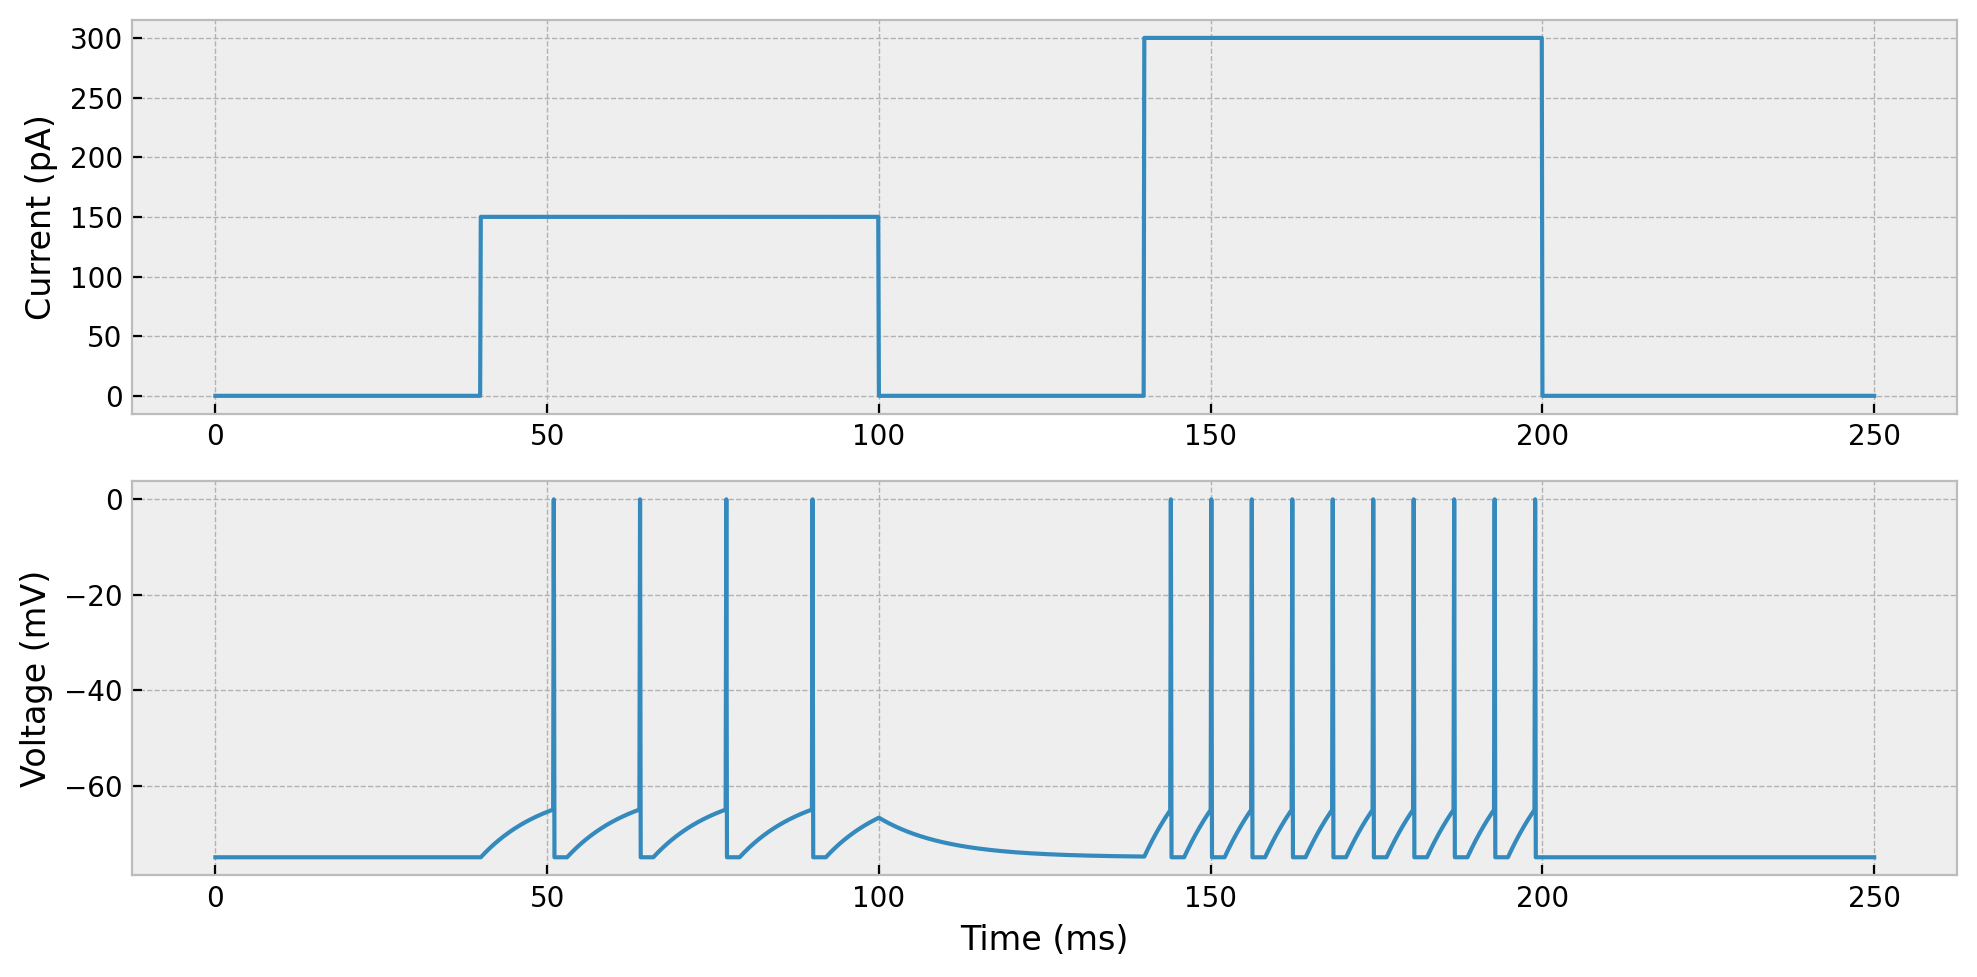

In [7]:
V, spike_times = LIF_simulation(I, dt, V_threshold=-65)
LIF_plot(time, I, V)

A typical current clamp experiment would be to inject step currents of increasing amplitude and observe the resulting spiking.

In [37]:
dt = 0.1  # (ms)
time = np.arange(0, 100+dt, dt)
Iamps = [50, 150, 250, 350, 450, 550]
V = np.zeros((len(Iamps), len(time)))
for i, Iamp in enumerate(Iamps):
    I = np.zeros(time.shape)  # (pA)
    I[(time >= 20) & (time < 80)] = Iamp
    V[i], spike_times = LIF_simulation(I, dt)

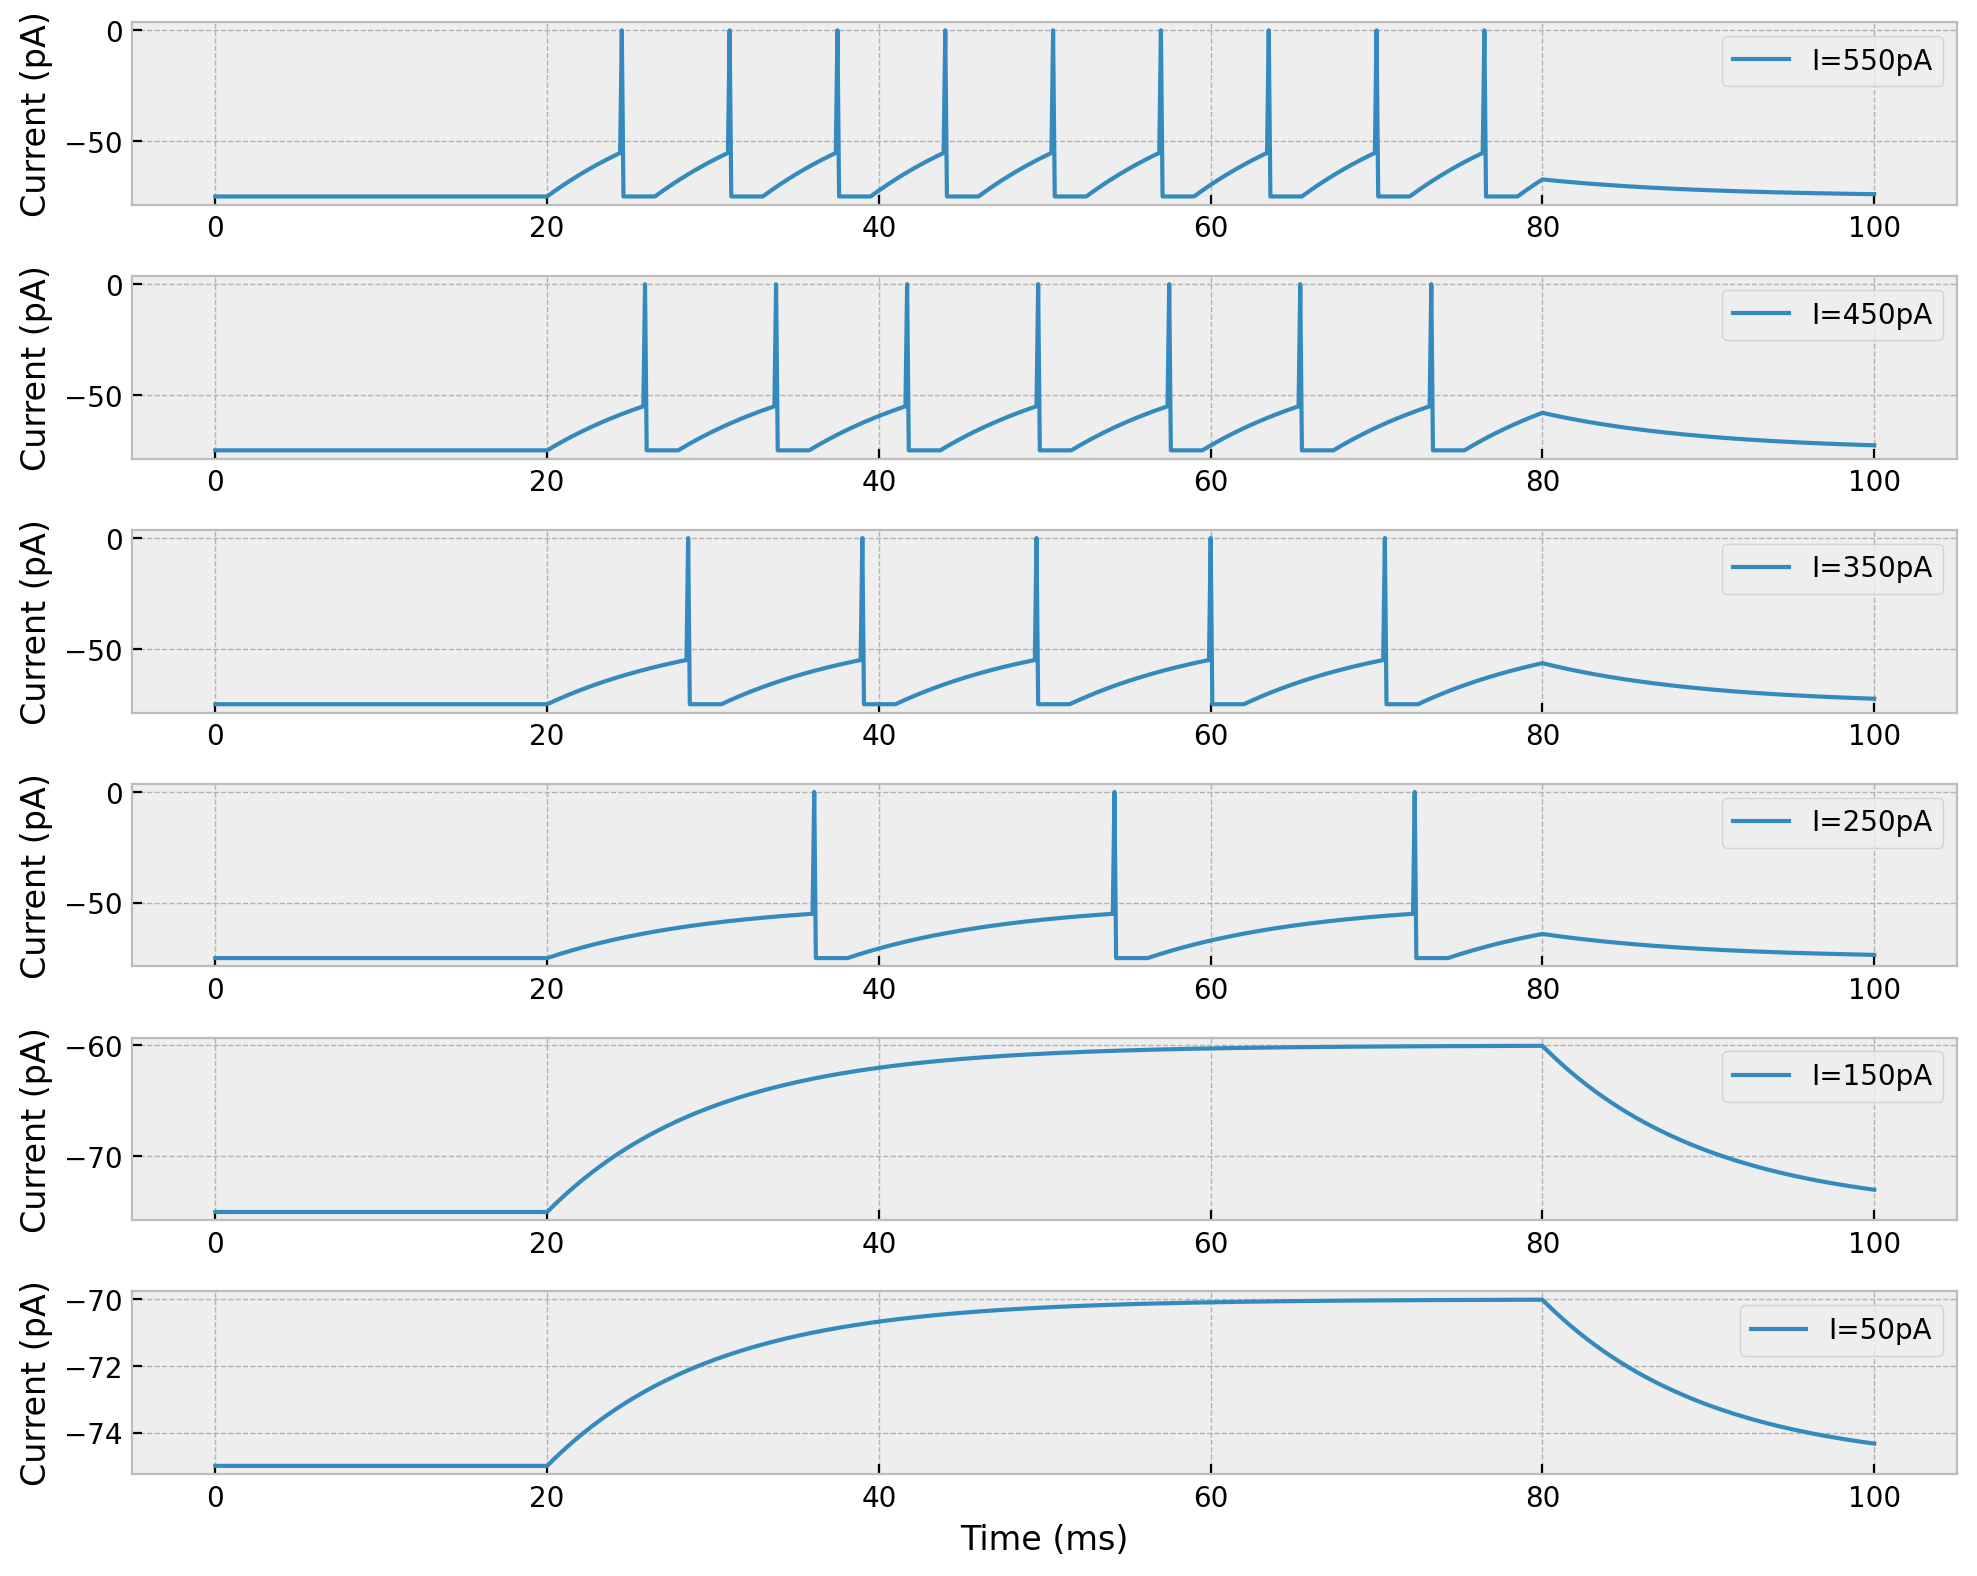

In [52]:
plt.figure(figsize=[10,8])
N = len(Iamps)
for i in reversed(range(N)):
    plt.subplot(N, 1, N-i)
    plt.plot(time, V[i], label=f'I={Iamps[i]}pA')
    plt.ylabel('Current (pA)')
    plt.legend()
plt.xlabel('Time (ms)')
plt.tight_layout();

### Exercise

Use the default LIF neuron parameters to simulate injecting a current ramp from 0 to 1000 pA over 500 ms.

In [8]:
# dt = 0.1  # (ms)
# time = np.arange(0, 500+dt, dt)
# I = ...
# V, spike_times = LIF_simulation(I, dt)
# LIF_plot(time, I, V)

### Exercise Key

Use the default LIF neuron parameters to simulate injecting a current ramp from 0 to 1000 pA over 500 ms.

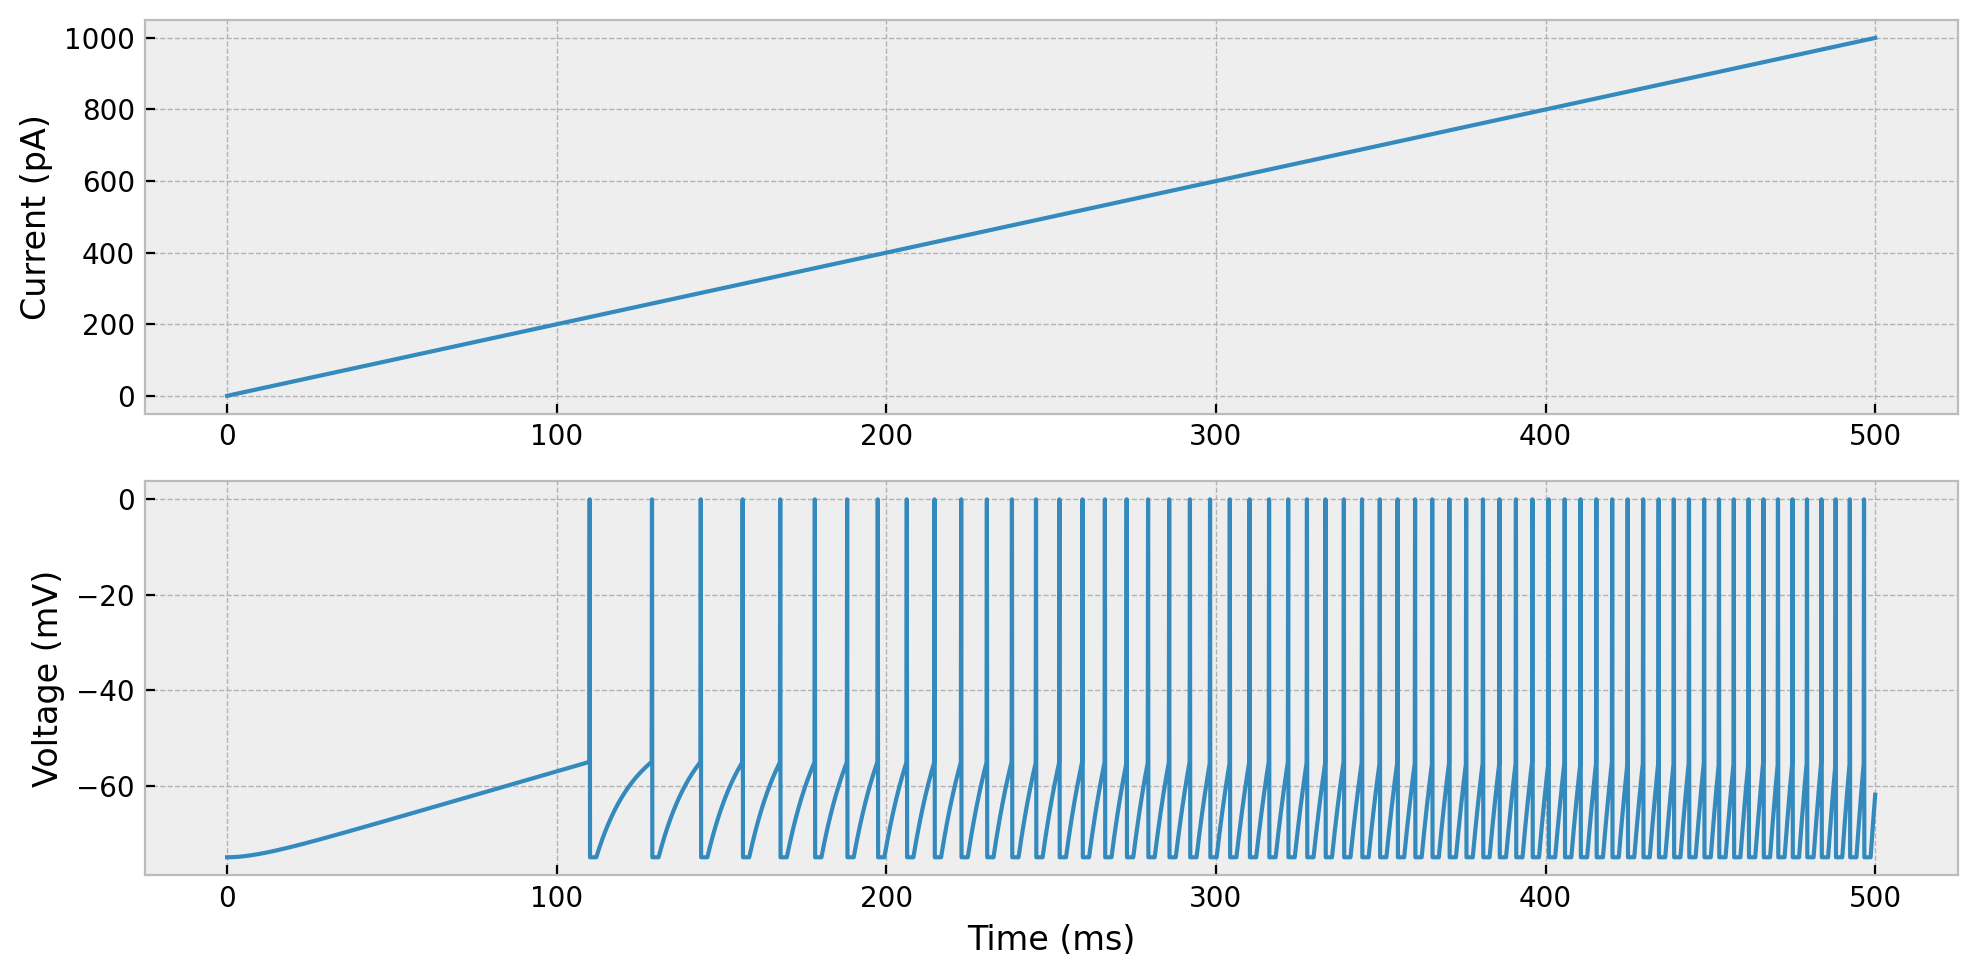

In [9]:
dt = 0.1  # (ms)
time = np.arange(0, 500+dt, dt)
I = np.linspace(0, 1000, len(time))
V, spike_times = LIF_simulation(I, dt)
LIF_plot(time, I, V)

### Exercise

Use the default LIF neuron parameters to simulate injecting five cycles of a sinusoidal current with amplitude 500 pA and cycle period 100 ms.

*Hint: $sin(2 \pi \omega t)$*

In [10]:
# dt = 0.1  # (ms)
# time = np.arange(0, 500+dt, dt)
# I = ...
# V, spike_times = LIF_simulation(I, dt)
# LIF_plot(time, I, V)

### Exercise Key

Use the default LIF neuron parameters to simulate injecting five cycles of a sinusoidal current with amplitude 500 pA and cycle period 100 ms.

*Hint: $sin(2 \pi \omega t)$*

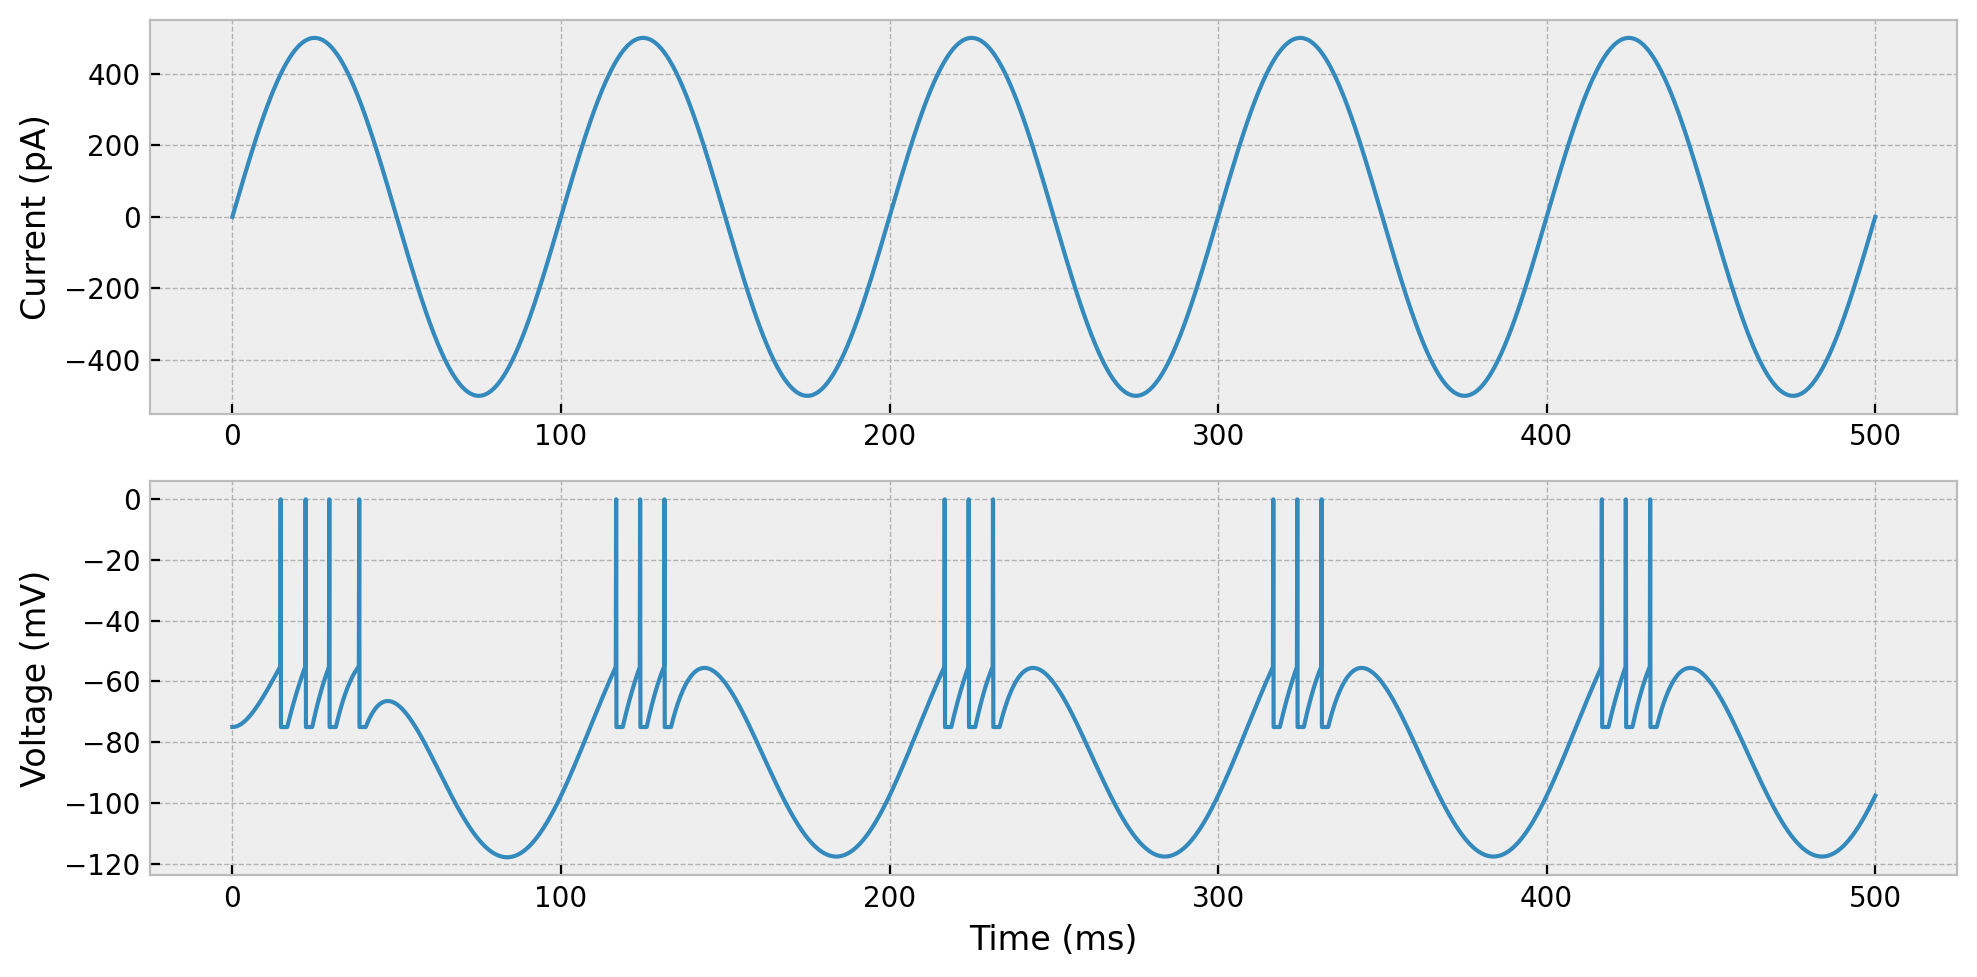

In [11]:
dt = 0.1  # (ms)
time = np.arange(0, 500+dt, dt)
I = 500 * np.sin(2 * np.pi / 100 * time)
V, spike_times = LIF_simulation(I, dt)
LIF_plot(time, I, V)

### Exercise

Use the default LIF neuron parameters to simulate injecting a holding current of 400 pA plus Gaussian noise with a standard deviation of 300 pA for a duration of 100 ms.

Also compute the neuron's spike rate from the simulation.

In [12]:
# dt = 0.1  # (ms)
# time = np.arange(0, 100+dt, dt)
# I = ...
# V, spike_times = LIF_simulation(I, dt)
# LIF_plot(time, I, V)
# f"Spike rate = {... :.1f} Hz"

### Exercise Key

Use the default LIF neuron parameters to simulate injecting a holding current of 400 pA plus Gaussian noise with a standard deviation of 300 pA for a duration of 100 ms.

Also compute the neuron's spike rate from the simulation.

'Spike rate = 110.0 Hz'

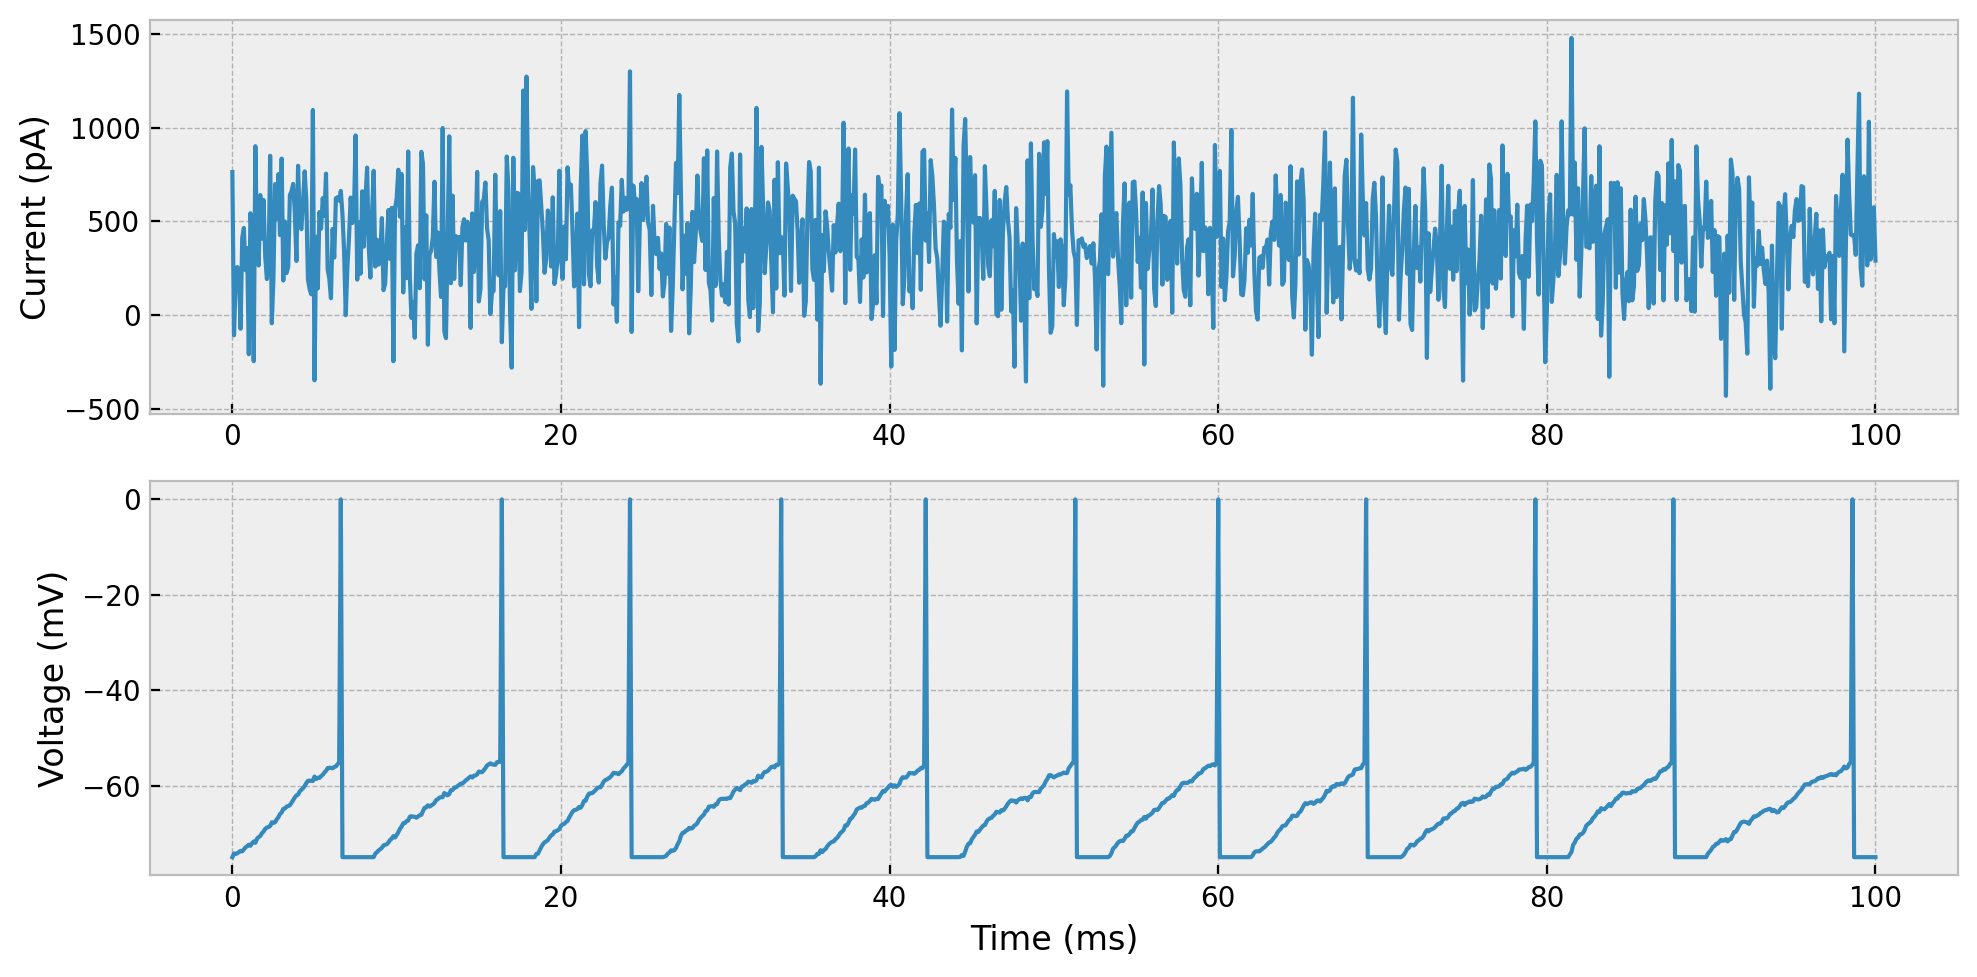

In [13]:
dt = 0.1  # (ms)
time = np.arange(0, 100+dt, dt)
I = 400 + 300 * np.random.randn(len(time))
V, spike_times = LIF_simulation(I, dt)
LIF_plot(time, I, V)
f"Spike rate = {len(spike_times) / 0.1 :.1f} Hz"

Repeat the above exercise to simulate injecting a holding current of 400 pA plus Gaussian noise with a standard deviation of 300 pA for a duration of 100 ms for each of 100 separate trials. *Compute new random current noise for each trial and store all of the spike times in a nested array of arrays.*

In [14]:
dt = 0.1  # (ms)
time = np.arange(0, 100+dt, dt)
spike_times_foreach_trial = []

for trial in range(100):
    I = 400 + 300 * np.random.randn(len(time))
    V, spike_times = LIF_simulation(I, dt)
    spike_times_foreach_trial.append(spike_times)

In [15]:
# spike times on trial 5
spike_times_foreach_trial[5]

[8.1,
 18.6,
 28.3,
 37.300000000000004,
 45.300000000000004,
 54.900000000000006,
 64.4,
 73.8,
 81.9,
 91.7]

Plot a spike raster for the simulated spikes on each trial.

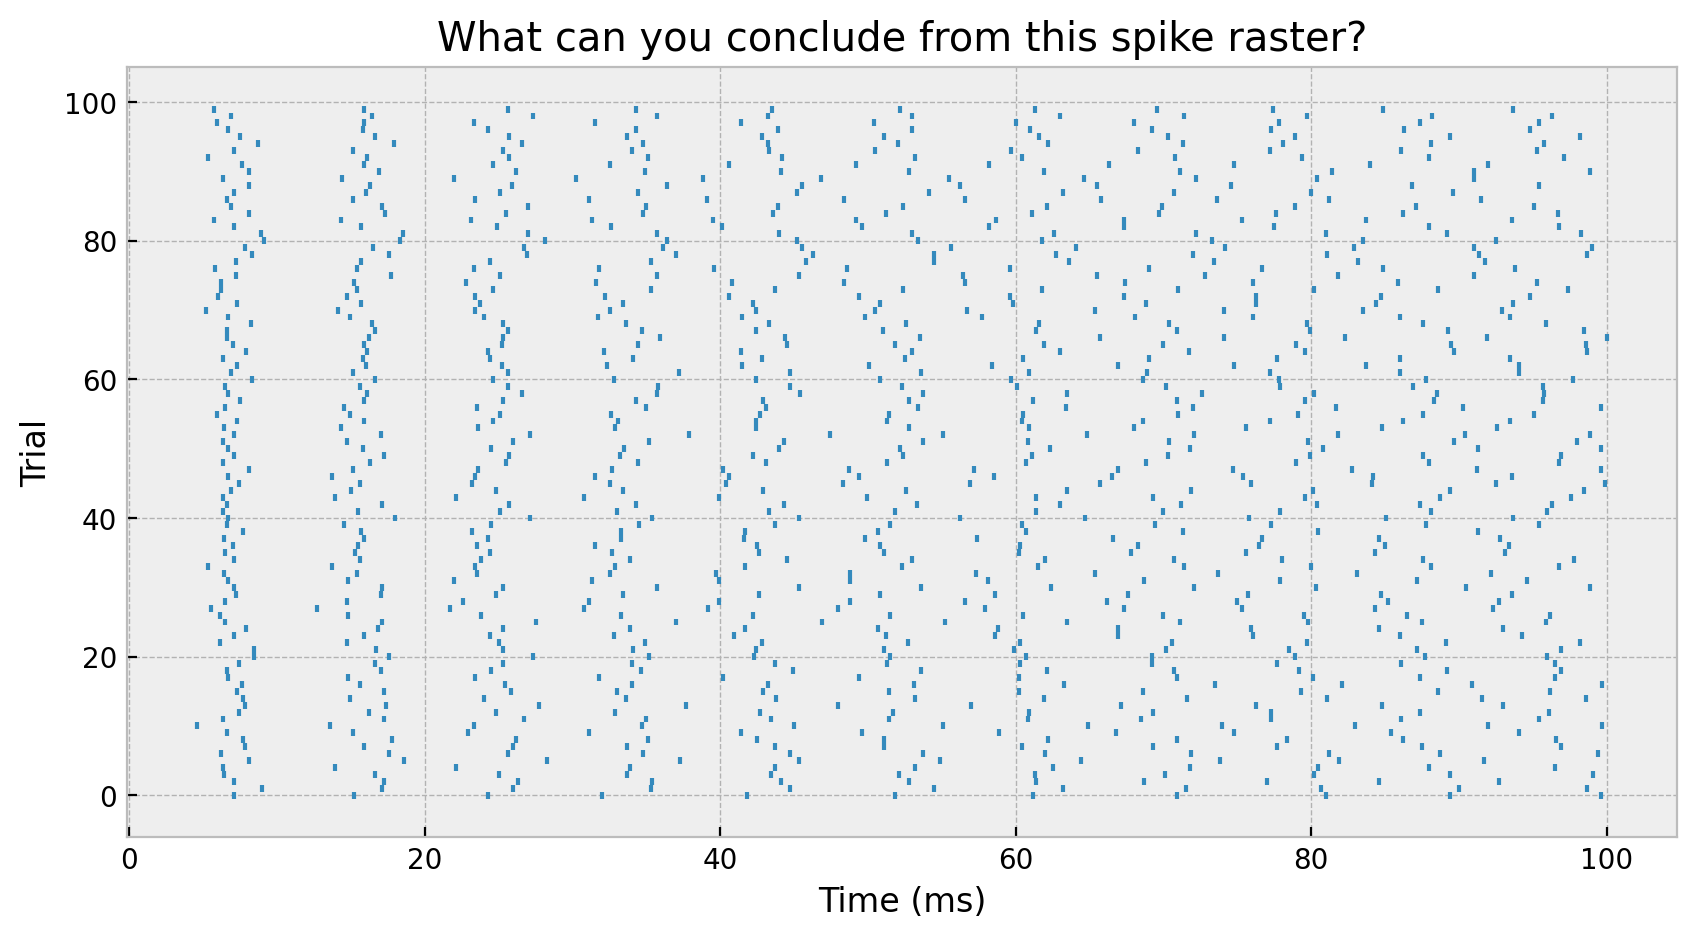

In [16]:
plt.eventplot(spike_times_foreach_trial)
plt.xlabel('Time (ms)')
plt.ylabel('Trial')
plt.title('What can you conclude from this spike raster?');

### Exercise
In the example above, adjust the amplitude of the current noise and see how this affects spiking across all 100 trials.

### LIF neuron with synaptic input.

Let's do slightly better than a simple leaky membrane.

Imagine the neuron is recieving input from other neurons via many synapses, with some portion of the synapses being excitatory (e.g., glutamatergic) and some inhibitory (e.g., GABAergic).

To simplify simulating these synaptic inputs let's assume that all of the inputs arrive at an average rate of 10 Hz (i.e., the presynaptic spike rate).

Let's simulate stochastic spike times for 100 presynaptic neurons over a 400 ms time period.

In [17]:
from scipy.stats import expon

# number of presynaptic inputs (one synapse per presynaptic neuron)
n_synapses = 100

# presynaptic neurons average spike rate
spike_rate = 10  # (Hz)

# nested list of spike times for all presynaptic inputs
presynaptic_spike_times = []  # (ms)

for i in range(n_synapses):
    spike_times = []  # (ms)
    last_spike_time = 0  # (ms)
    while last_spike_time < 400:
        # random interspike intervals for a constant average spike rate
        # are exponentially distributed
        dt_s = expon.rvs(0, 1/spike_rate)  # (sec)
        dt_ms = dt_s * 1000  # (ms)
        last_spike_time += dt_ms
        if last_spike_time <= 400:
            spike_times.append(last_spike_time)
    presynaptic_spike_times.append(spike_times)

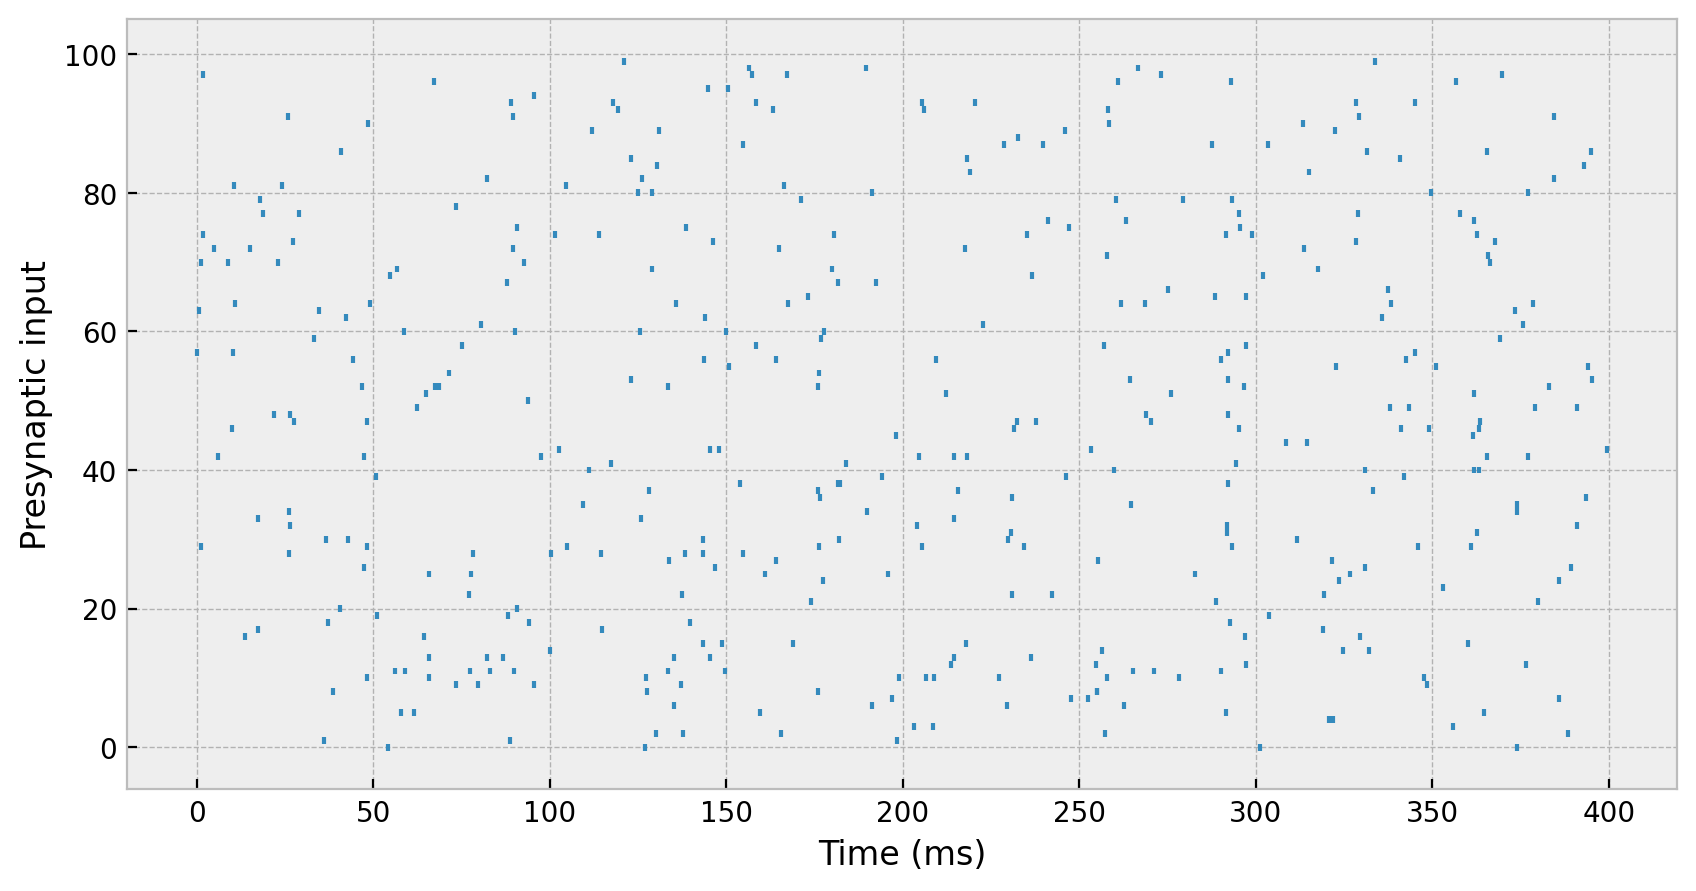

In [18]:
plt.eventplot(presynaptic_spike_times)
plt.xlabel('Time (ms)')
plt.ylabel('Presynaptic input');

Let's assume that the first 80 inputs are excitatory and the last 20 inputs are inhibitory.

In [19]:
excitatory_spike_times = presynaptic_spike_times[:80]
inhibitory_spike_times = presynaptic_spike_times[80:]

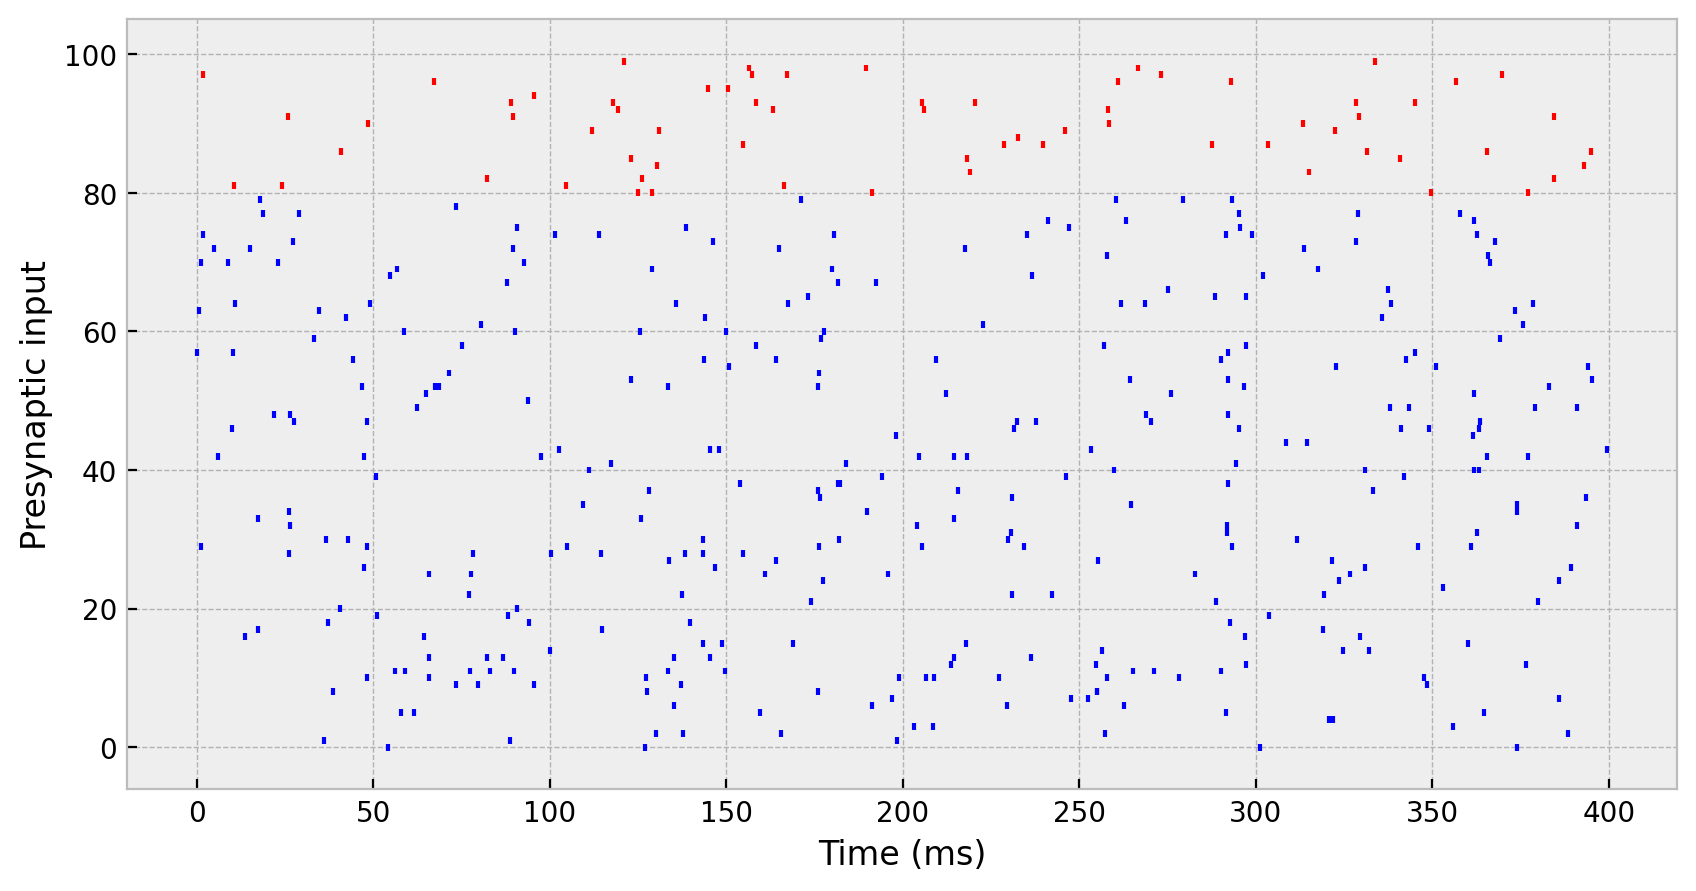

In [20]:
plt.eventplot(presynaptic_spike_times, colors='b'*80+'r'*20)
plt.xlabel('Time (ms)')
plt.ylabel('Presynaptic input');

For simplicity in the simulation, let's create arrays of the number of excitatory and inhibitory spikes on each time step of our simulation.

In [21]:
# simulation time steps from 0-400 ms
dt = 0.1  # (ms)
time = np.arange(0, 400+dt, dt)  # (ms)

n_excitatory_spikes = np.zeros(time.shape)
n_inhibitory_spikes = np.zeros(time.shape)

for input_index in range(len(excitatory_spike_times)):
    for spike_time in excitatory_spike_times[input_index]:
        time_step_index = int(spike_time / dt)
        n_excitatory_spikes[time_step_index] += 1

for input_index in range(len(inhibitory_spike_times)):
    for spike_time in inhibitory_spike_times[input_index]:
        time_step_index = int(spike_time / dt)
        n_inhibitory_spikes[time_step_index] += 1

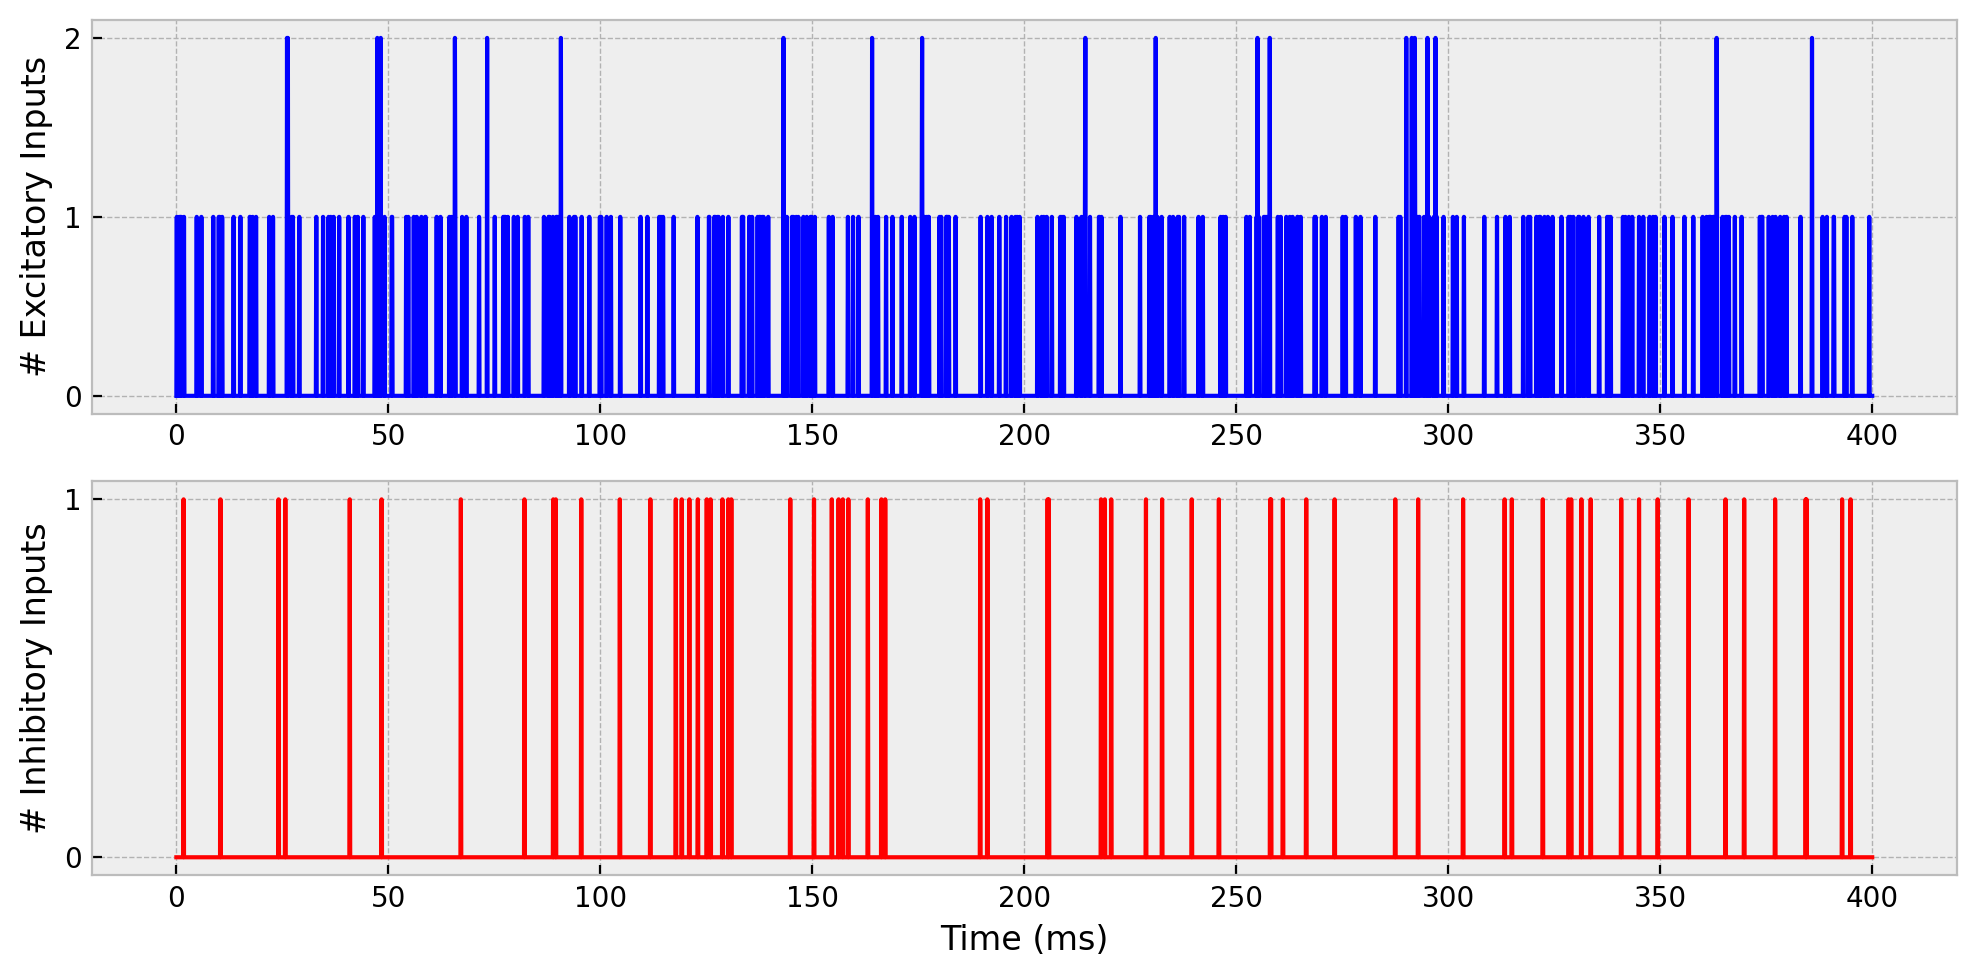

In [22]:
plt.subplot(2, 1, 1)
plt.plot(time, n_excitatory_spikes, 'b', label='excitatory')
plt.yticks(np.arange(max(n_excitatory_spikes) + 1))
plt.ylabel('# Excitatory Inputs')

plt.subplot(2, 1, 2)
plt.plot(time, n_inhibitory_spikes, 'r')
plt.yticks(np.arange(max(n_inhibitory_spikes) + 1))
plt.xlabel('Time (ms)')
plt.ylabel('# Inhibitory Inputs')

plt.tight_layout();

Ok, so now we have simulated a bunch of excitatory and inhibitory synaptic inputs from presynaptic neurons.

How do we make our neuron respond to those inputs?

We will add excitatory and inhibitory conductances to our membrane model and have those conductances be driven by the input spikes.

Recall our LIF neuron with leak conductance ($g_L$) and leak reversal potential ($E_L$):

$I = C \frac{dV}{dt} + g_L \left( V - E_L \right)$

Now add excitatory ($g_E$) and inhibitory ($g_I$) conductances with their own respective reversal potentials:

$I = C \frac{dV}{dt} + g_L \left( V - E_L \right) + g_E \left( V - E_E \right) + g_I \left( V - E_I \right)$

Rearrange as before:

$C \frac{dV}{dt} = -g_L \left( V - E_L \right) - g_E \left( V - E_E \right) - g_I \left( V - E_I \right) + I$

$\tau \frac{dV}{dt} = - \left( V - E_L \right) - \frac{g_E}{g_L} \left( V - E_E \right) - \frac{g_I}{g_L} \left( V - E_I \right) + \frac{I}{g_L}$

$dV = \left(- \left( V - E_L \right) - \frac{g_E}{g_L} \left( V - E_E \right) - \frac{g_I}{g_L} \left( V - E_I \right) + \frac{I}{g_L} \right) \frac{dt}{\tau}$

This now describes the membrane dynamics of our LIF neuron with additional excitatory and inhibitory conductances.

*!!! However, unlike the leak, the excitatory and inhibitory conductances are NOT constant in time.*

Imagine that each time the neuron recieves an input via one of its excitatory (inhibitory) synapses, $g_E$ ($g_I$) increases by $s_E$ ($s_I$).

Thus, $s_E$ ($s_I$) are the excitatory (inhibitory) synaptic strengths.

They describe the neuron's postsynaptic current response to a presynaptic spike.

For simplicity, in addition to having the same input spike rates, we also assume that all excitatory (inhibitory) synapses have identical postsynaptic responses to those inputs.

Of course, you can imagine a more complex model where this is not the case, but for now...

Now our job is to define how the time-dependent conductances $g_E$ and $g_I$ should evolve in time.

In general this can be a complex function of the time-dependent behavior of all sorts of ionic conductances shaped by things like diffusion of neurotransmitter in the synapse and the time course of the response of postsynaptic ion channels.

For simplicity, let's describe the neuron's response to an input spike as an exponentially decaying conductance with some time constant that may differ between excitatory and inhibitory synapses. This grossly approximates the rapid opening and slower decay of postsynaptic neurotransmitter-gated ion channels.

The following equations describe an exponentially decaying $g_E$ and $g_I$ with time constant $\tau_E$ and $\tau_I$, respectively. Revisit your basic calculus!

$\frac{dg_E}{dt} = -\frac{g_E}{\tau_E}$

$\frac{dg_I}{dt} = -\frac{g_I}{\tau_I}$

Only considering their decay, the change in conductance per time step $dt$ is:

$dg_E = -g_E \frac{dt}{\tau_E}$

$dg_I = -g_I \frac{dt}{\tau_I}$

But we also want $g_E$ and $g_I$ to respond to the input spikes by increasing by the amount $s_E$ or $s_I$ per spike, respectively.

For a number $N_E$ ($N_I$) of excitatory (inhibitory) synaptic inputs in a given time interval $dt$, the change in conductance is:

$dg_E = -g_E \frac{dt}{\tau_E} + N_E s_E$

$dg_I = -g_I \frac{dt}{\tau_I} + N_I s_I$

Our full model for the neuron's membrane dynamics:

$dV = \left( - \left( V - E_L \right) - \frac{g_E}{g_L} \left( V - E_E \right) - \frac{g_I}{g_L} \left( V - E_I \right) + \frac{I}{g_L} \right) \frac{dt}{\tau}$

And change in excitatory and inhibitory conductances per time step $dt$:

$dg_E = -g_E \frac{dt}{\tau_E} + N_E s_E$

$dg_I = -g_I \frac{dt}{\tau_I} + N_I s_I$

In [23]:
def LIF_synaptic(
    I, dt, NE, NI,
    V0=-75, EL=-75, gL=10, tau=10, V_threshold=-55, V_reset=-75, tau_refractory=2,
    sE=1.2, sI=1.6, tauE=5, tauI=10, EE=0, EI=-80
):
    # I: injected current (pA) for all time points in the simulation
    # dt: sample interval (ms)
    # NE: number of excitatory synaptic inputs for each time point
    # NI: number of inhibitory synaptic inputs for each time point
    # V0: initial membrane voltage (mV) at the start of the simulation
    # EL: leak reversal potential (mV)
    # gL: leak conductance (nS)
    # tau: membrane time constant (ms)
    # V_threshold: spike threshold (mV)
    # V_reset: refractory potential (mV)
    # tau_refractory: refractory time (ms)
    # sE: excitatory synaptic strength (nS)
    # sI: inhibitory synaptic strength (nS)
    # tauE: excitatory synaptic time constant (ms)
    # tauI: inhibitory synaptic time constant (ms)
    # EE: excitatory reversal potential (mV)
    # EI: inhibitory reversal potential (mV)

    # time dependent excitatory and inhibitory conductances
    # these will be computed from the input spike trains
    gE = np.zeros(NE.shape)
    gI = np.zeros(NI.shape)

    # LIF neuron
    spike_times = []
    refractory_time = 0
    V = np.zeros(I.shape)
    V[0] = V0
    for i in range(1, len(V)):
        # update the synaptic conductances
        gE[i] = gE[i-1] - gE[i-1] * (dt / tauE) + NE[i] * sE
        gI[i] = gI[i-1] - gI[i-1] * (dt / tauI) + NI[i] * sI

        # in refractory period?
        if refractory_time > 0:
            V[i] = V_reset
            refractory_time -= dt
            continue
        
        # change in membrane voltage for ith time step
        dV = (
            -(V[i-1] - EL) 
            - gE[i-1] / gL * (V[i-1] - EE) 
            - gI[i-1] / gL * (V[i-1] - EI) 
            + I[i-1] / gL
            ) * (dt / tau)

        V[i] = V[i-1] + dV

        # spike?
        if V[i] >= V_threshold:
            spike_times.append(i * dt)
            V[i] = 0  # just so spike is obvious
            refractory_time = tau_refractory

    return V, spike_times, gE, gI

Simulate the neuron's response to the synaptic inputs.

In [24]:
# we won't inject any current
# only inputs will be from presynaptic neurons
I = np.zeros(time.shape)

V, spike_times, gE, gI = LIF_synaptic(I, dt, n_excitatory_spikes, n_inhibitory_spikes)

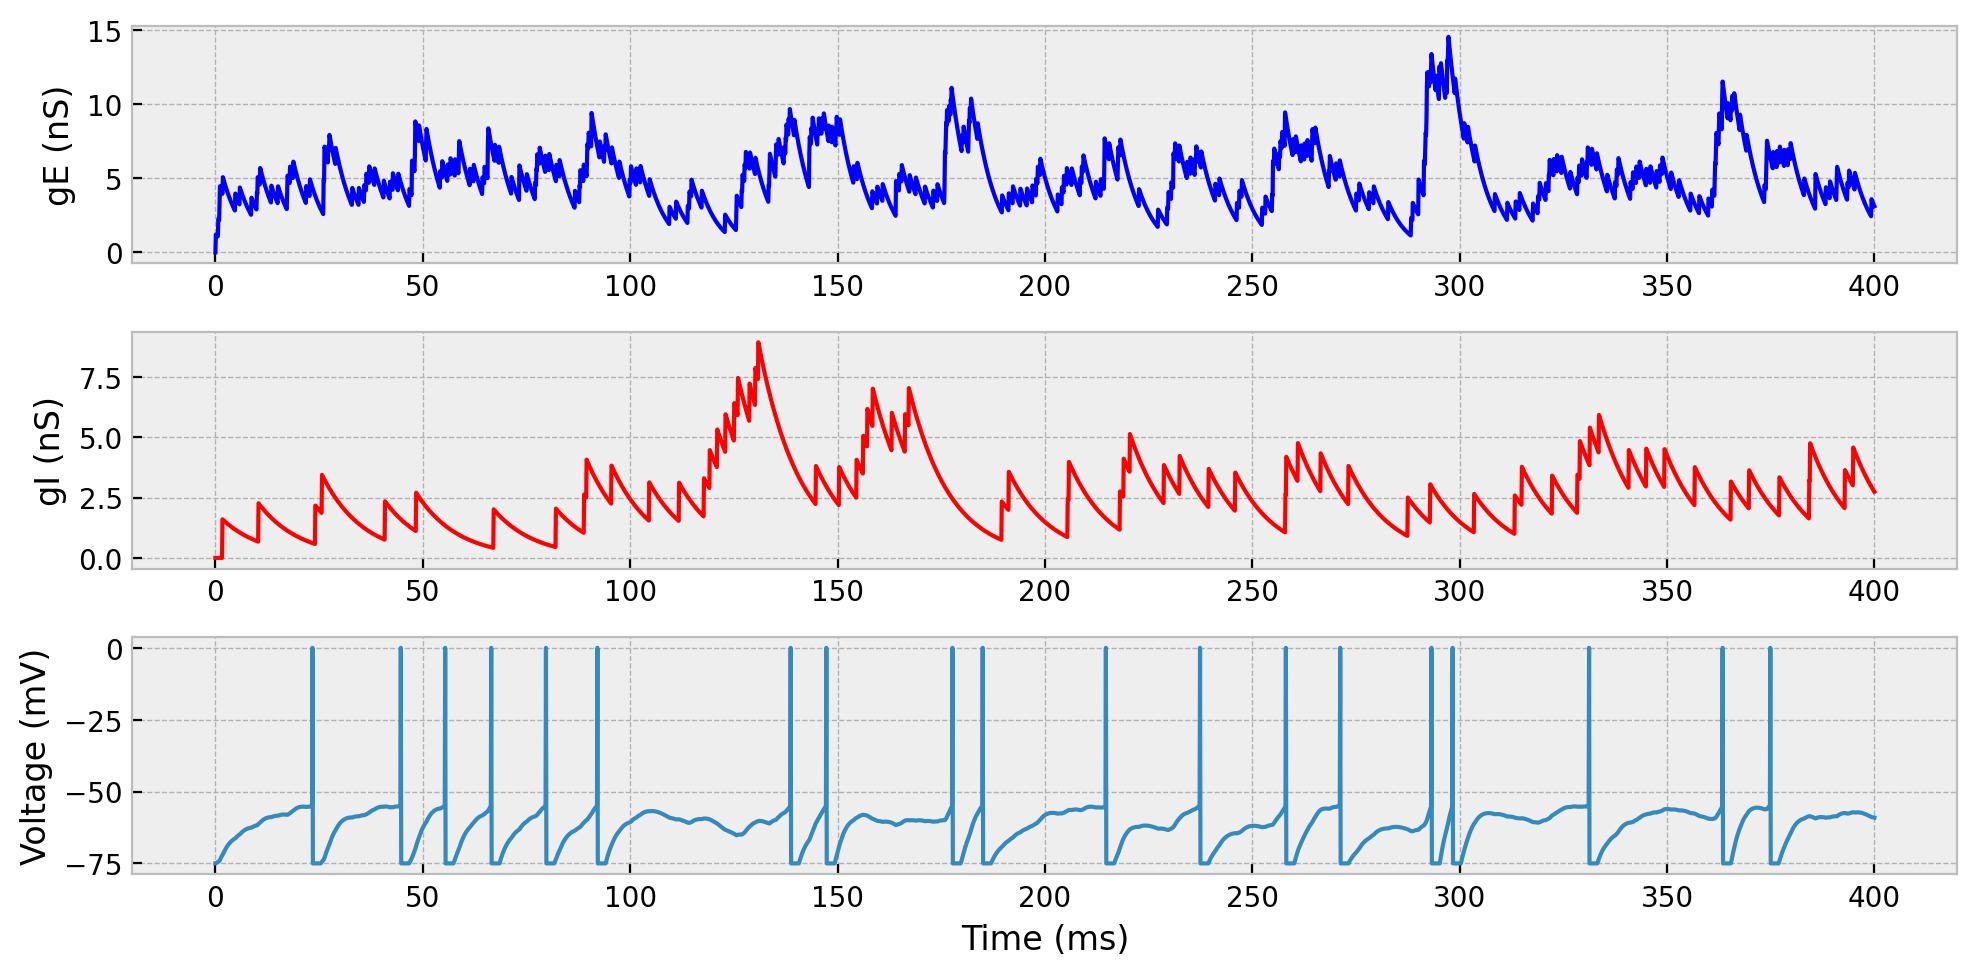

In [25]:
plt.subplot(3, 1, 1)
plt.plot(time, gE, 'b')
plt.ylabel('gE (nS)')

plt.subplot(3, 1, 2)
plt.plot(time, gI, 'r')
plt.ylabel('gI (nS)')

plt.subplot(3, 1, 3)
plt.plot(time, V)
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (mV)')

plt.tight_layout();

Consider each synapses impulse response to a single presynaptic spike.

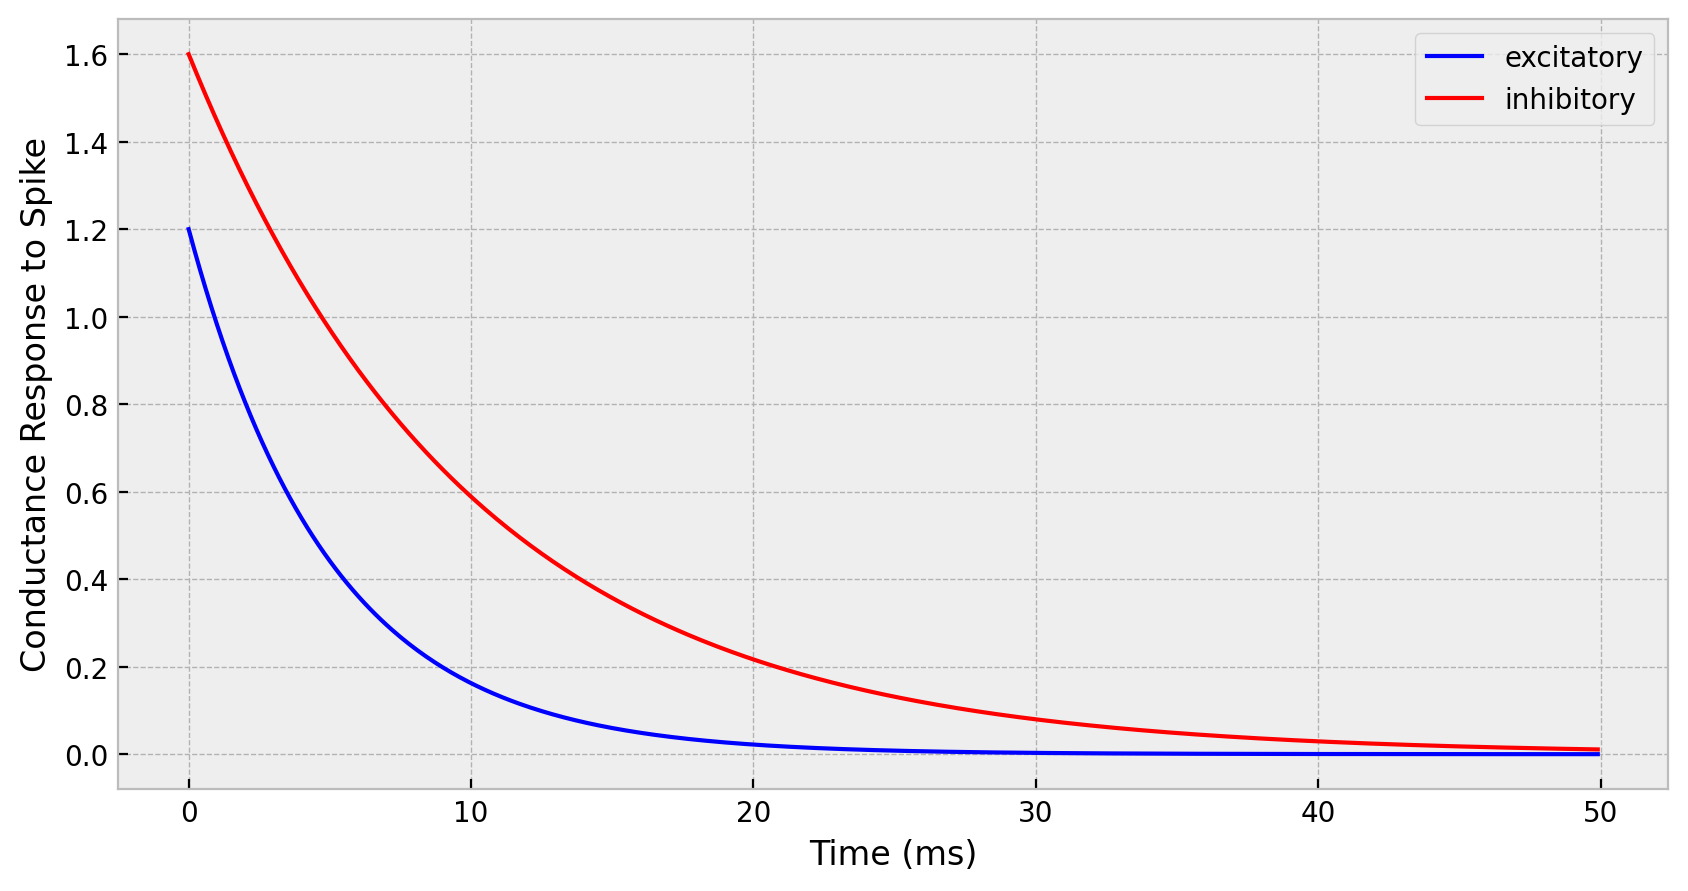

In [26]:
# impulse response to each excitatory or inhibitory spike
sE=1.2
sI=1.6
tauE=5
tauI=10

t = np.arange(500) * dt

excitatory_spike_response = sE * np.exp(-t / tauE)
inhibitory_spike_response = sI * np.exp(-t / tauI)

plt.plot(t, excitatory_spike_response, 'b', label='excitatory')
plt.plot(t, inhibitory_spike_response, 'r', label='inhibitory')
plt.xlabel('Time (ms)')
plt.ylabel('Conductance Response to Spike')
plt.legend();

Convolve the synaptic impulse response with the incoming spike train to get the excitatory and inhibitory conductance time series.

In [27]:
gE_conv = np.convolve(n_excitatory_spikes, excitatory_spike_response)
gI_conv = np.convolve(n_inhibitory_spikes, inhibitory_spike_response)

# only keep the same number of points as in the simulaiton
gE_conv = gE_conv[:len(time)]
gI_conv = gI_conv[:len(time)]

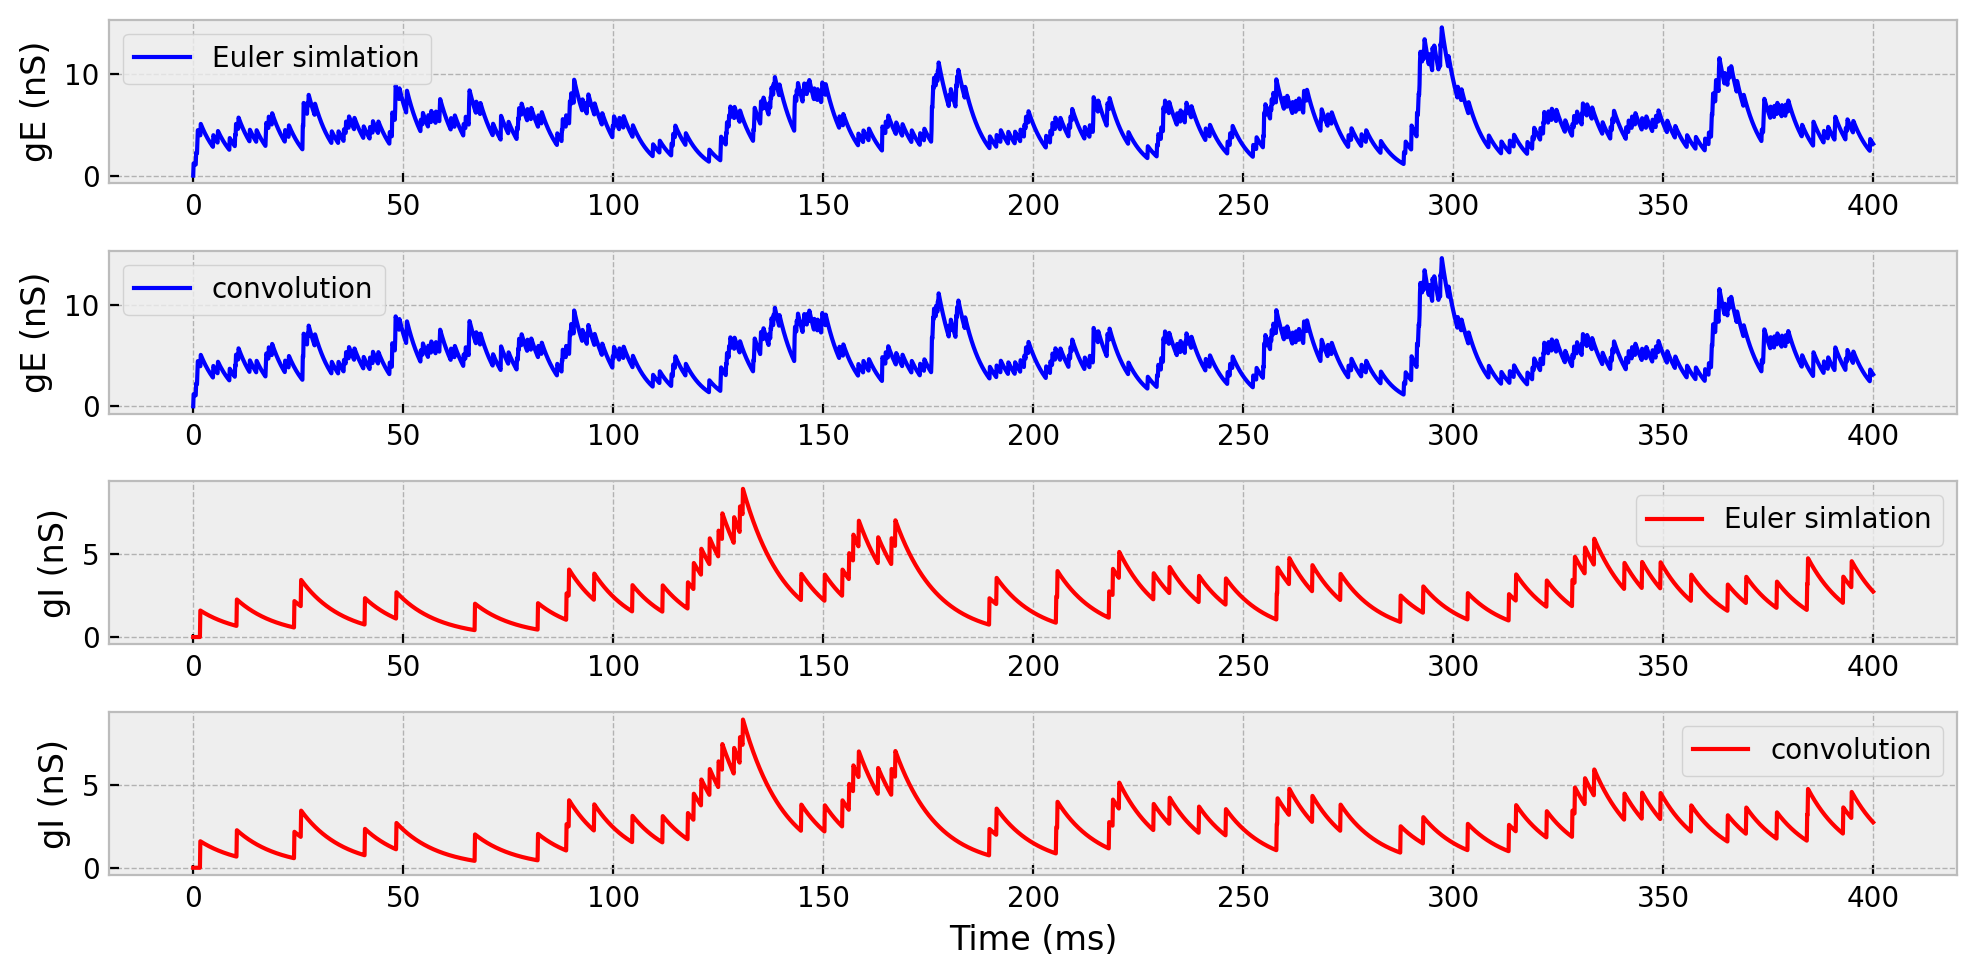

In [28]:
plt.subplot(4, 1, 1)
plt.plot(time, gE, 'b', label='Euler simlation')
plt.ylabel('gE (nS)')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(time, gE_conv, 'b', label='convolution')
plt.ylabel('gE (nS)')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(time, gI, 'r', label='Euler simlation')
plt.ylabel('gI (nS)')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(time, gI, 'r', label='convolution')
plt.xlabel('Time (ms)')
plt.ylabel('gI (nS)')
plt.legend()

plt.tight_layout();

Redo the simulation code using convolution to define the synaptic conductances.

In [29]:
def LIF_synaptic_conv(
    I, dt, NE, NI,
    V0=-75, EL=-75, gL=10, tau=10, V_threshold=-55, V_reset=-75, tau_refractory=2,
    sE=1.2, sI=1.6, tauE=5, tauI=10, EE=0, EI=-80
):
    # I: injected current (pA) for all time points in the simulation
    # dt: sample interval (ms)
    # NE: number of excitatory synaptic inputs for each time point
    # NI: number of inhibitory synaptic inputs for each time point
    # V0: initial membrane voltage (mV) at the start of the simulation
    # EL: leak reversal potential (mV)
    # gL: leak conductance (nS)
    # tau: membrane time constant (ms)
    # V_threshold: spike threshold (mV)
    # V_reset: refractory potential (mV)
    # tau_refractory: refractory time (ms)
    # sE: excitatory synaptic strength (nS)
    # sI: inhibitory synaptic strength (nS)
    # tauE: excitatory synaptic time constant (ms)
    # tauI: inhibitory synaptic time constant (ms)
    # EE: excitatory reversal potential (mV)
    # EI: inhibitory reversal potential (mV)

    # time dependent excitatory and inhibitory conductances
    # by convolving impulse response with spike count train
    t = np.arange(500) * dt
    excitatory_spike_response = sE * np.exp(-t / tauE)
    inhibitory_spike_response = sI * np.exp(-t / tauI)
    gE = np.convolve(NE, excitatory_spike_response)[:len(NE)]
    gI = np.convolve(NI, inhibitory_spike_response)[:len(NI)]

    # LIF neuron
    spike_times = []
    refractory_time = 0
    V = np.zeros(I.shape)
    V[0] = V0
    for i in range(1, len(V)):
        # in refractory period?
        if refractory_time > 0:
            V[i] = V_reset
            refractory_time -= dt
            continue
        
        # change in membrane voltage for ith time step
        dV = (
            -(V[i-1] - EL) 
            - gE[i-1] / gL * (V[i-1] - EE) 
            - gI[i-1] / gL * (V[i-1] - EI) 
            + I[i-1] / gL
            ) * (dt / tau)

        V[i] = V[i-1] + dV

        # spike?
        if V[i] >= V_threshold:
            spike_times.append(i * dt)
            V[i] = 0  # just so spike is obvious
            refractory_time = tau_refractory

    return V, spike_times, gE, gI

Simulate again (should tbe the same as before).

In [30]:
# we won't inject any current
# only inputs will be from presynaptic neurons
I = np.zeros(time.shape)

V, spike_times, gE, gI = LIF_synaptic(I, dt, n_excitatory_spikes, n_inhibitory_spikes)

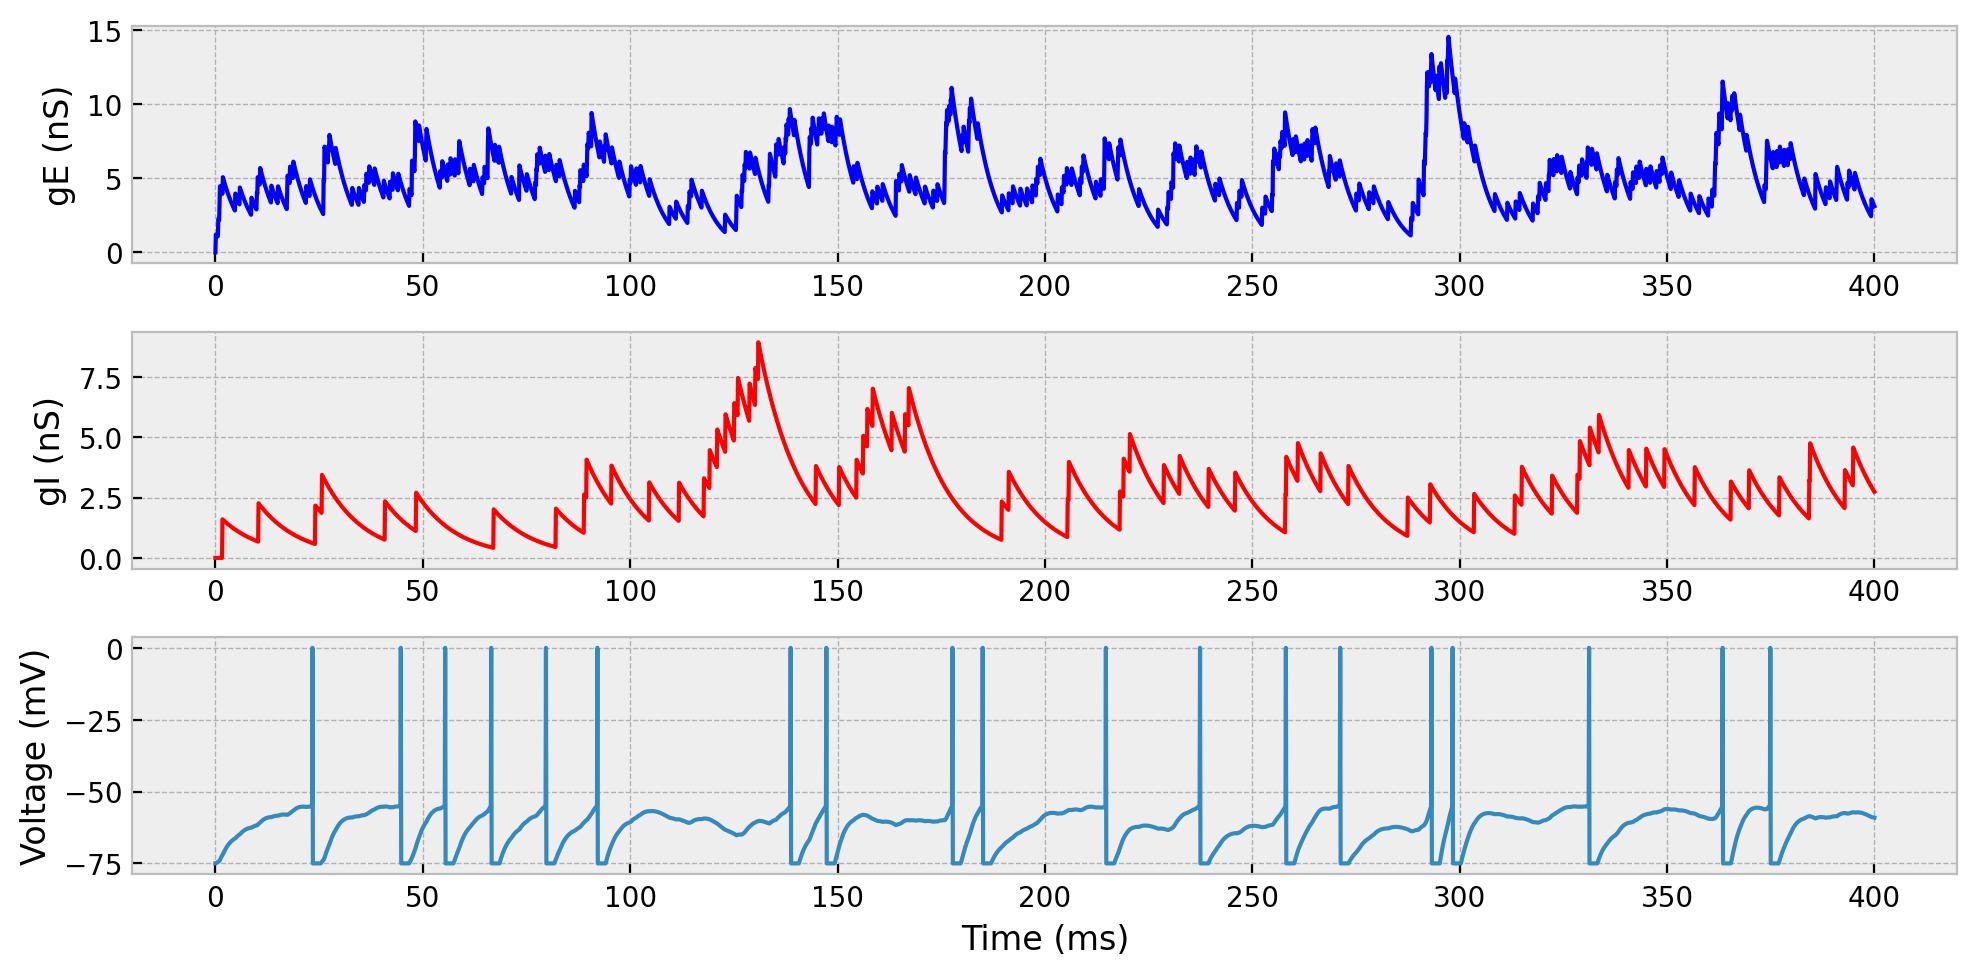

In [31]:
plt.subplot(3, 1, 1)
plt.plot(time, gE, 'b')
plt.ylabel('gE (nS)')

plt.subplot(3, 1, 2)
plt.plot(time, gI, 'r')
plt.ylabel('gI (nS)')

plt.subplot(3, 1, 3)
plt.plot(time, V)
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (mV)')

plt.tight_layout();

### Exercise
In the example above, adjust the amplitude of the excitatory and inhibitory synaptic strengths and see how this affects the simulation.